<a href="https://colab.research.google.com/github/NataliaKolesnik/IT_volunteer/blob/master/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задача № 2. Бухгалтерска отчетность НКО (раздел 2 - анализ данных на поставленные вопросы)

***Работу выполнили Команда № 1 "Researchers"***
* Капитан команды: `Колесник Наталья`
* Члены команды:   `Григорьева Людмила, Ямилова Алсу, Ковалева Надежда, Фараджзаде Руслан`

In [ ]:
import pandas as pd
import numpy as np

import sklearn
from sklearn.neighbors import NearestNeighbors

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

pd.set_option('display.max_columns', 165)
# отключаем экспоненциальную запись
pd.set_option('display.float_format', lambda x: '%.2f' % x)

FONT_TITLE = 20
FONT_LABEL = 15

## Загрузка и подготовка данных

In [ ]:
data = pd.read_csv("data/data_prepare.csv")

In [ ]:
data.head(3)

,Наименование,Регистрационный номер,Дата регистрации,Статус,Код налогоплательщика,Регион регистрации,Код ОКАТО,Наименование ОКАТО,Код ОКТМО,Организационно-правовая форма,Код ОКОПФ,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2017, Дебиторская задолженность, KRUB","2018, Дебиторская задолженность, KRUB","2019, Дебиторская задолженность, KRUB","2020, Дебиторская задолженность, KRUB","2021, Дебиторская задолженность, KRUB","2017, Денежные средства и денежные эквиваленты, KRUB","2018, Денежные средства и денежные эквиваленты, KRUB","2019, Денежные средства и денежные эквиваленты, KRUB","2020, Денежные средства и денежные эквиваленты, KRUB","2021, Денежные средства и денежные эквиваленты, KRUB","2017, Капитал и резервы, KRUB","2018, Капитал и резервы, KRUB","2019, Капитал и резервы, KRUB","2020, Капитал и резервы, KRUB","2021, Капитал и резервы, KRUB","2017, Заёмные средства (краткосрочные), KRUB","2018, Заёмные средства (краткосрочные), KRUB","2019, Заёмные средства (краткосрочные), KRUB","2020, Заёмные средства (краткосрочные), KRUB","2021, Заёмные средства (краткосрочные), KRUB","2017, Кредиторская задолженность, KRUB","2018, Кредиторская задолженность, KRUB","2019, Кредиторская задолженность, KRUB","2020, Кредиторская задолженность, KRUB","2021, Кредиторская задолженность, KRUB","2017, Пассивы всего, KRUB","2018, Пассивы всего, KRUB","2019, Пассивы всего, KRUB","2020, Пассивы всего, KRUB","2021, Пассивы всего, KRUB","2017, Выручка, KRUB","2018, Выручка, KRUB","2019, Выручка, KRUB","2020, Выручка, KRUB","2021, Выручка, KRUB","2017, Себестоимость продаж, KRUB","2018, Себестоимость продаж, KRUB","2019, Себестоимость продаж, KRUB","2020, Себестоимость продаж, KRUB","2021, Себестоимость продаж, KRUB","2017, Валовая прибыль (убыток), KRUB","2018, Валовая прибыль (убыток), KRUB","2019, Валовая прибыль (убыток), KRUB","2020, Валовая прибыль (убыток), KRUB","2021, Валовая прибыль (убыток), KRUB","2017, Коммерческие расходы, KRUB","2018, Коммерческие расходы, KRUB","2019, Коммерческие расходы, KRUB","2020, Коммерческие расходы, KRUB","2021, Коммерческие расходы, KRUB","2017, Управленческие расходы, KRUB","2018, Управленческие расходы, KRUB","2019, Управленческие расходы, KRUB","2020, Управленческие расходы, KRUB","2021, Управленческие расходы, KRUB","2017, Прибыль (убыток) от продажи, KRUB","2018, Прибыль (убыток) от продажи, KRUB","2019, Прибыль (убыток) от продажи, KRUB","2020, Прибыль (убыток) от продажи, KRUB","2021, Прибыль (убыток) от продажи, KRUB","2017, Доходы от участия в других организациях, KRUB","2018, Доходы от участия в других организациях, KRUB","2019, Доходы от участия в других организациях, KRUB","2020, Доходы от участия в других организациях, KRUB","2021, Доходы от участия в других организациях, KRUB","2017, Проценты к получению, KRUB","2018, Проценты к получению, KRUB","2019, Проценты к получению, KRUB","2020, Проценты к получению, KRUB","2021, Проценты к получению, KRUB","2017, Проценты к уплате, KRUB","2018, Проценты к уплате, KRUB","2019, Проценты к уплате, KRUB","2020, Проценты к уплате, KRUB","2021, Проценты к уплате, KRUB","2017, Прочие доходы, KRUB","2018, Прочие доходы, KRUB","2019, Прочие доходы, KRUB","2020, Прочие доходы, KRUB","2021, Прочие доходы, KRUB","2017, Прочие расходы, KRUB","2018, Прочие расходы, KRUB","2019, Прочие расходы, KRUB","2020, Прочие расходы, KRUB","2021, Прочие расходы, KRUB","2017, Прибыль (убыток) до налогообложения , KRUB","2018, Прибыль (убыток) до налогообложения , KRUB","2019, Прибыль (убыток) до налогообложения , KRUB","2020, Прибыль (убыток) до налогообложения , KRUB","2021, Прибыль (убыток) до налогообложения , KRUB","2017, Текущий налог на прибыль, KRUB","2018, Текущий налог на прибыль, KRUB","2019, Текущий налог на прибыль, KRUB","2020, Текущий налог на прибыль, KRUB","2021, Текущий налог на прибыль, KRUB","2017, Чистая прибыль (убыток), KRUB","2018, Чистая прибыль (убыток), KRUB","2019, Чистая прибыль (убыток), KRUB","2020, 

In [ ]:
otch_col = ['Среднесписочная численность работников', 'Дебиторская задолженность, RUB',\
            'Денежные средства и денежные эквиваленты, RUB', 'Капитал и резервы, RUB',\
            'Заёмные средства (краткосрочные), RUB', 'Кредиторская задолженность, RUB',\
            'Пассивы всего, RUB', 'Выручка, RUB', 'Себестоимость продаж, RUB',\
            'Валовая прибыль (убыток), RUB', 'Коммерческие расходы, RUB',\
            'Управленческие расходы, RUB', 'Прибыль (убыток) от продажи, RUB',\
            'Доходы от участия в других организациях, RUB', 'Проценты к получению, RUB',\
            'Проценты к уплате, RUB', 'Прочие доходы, RUB', 'Прочие расходы, RUB',\
            'Прибыль (убыток) до налогообложения , RUB', 'Текущий налог на прибыль, RUB',\
            'Чистая прибыль (убыток), RUB', 'Прибыль от приносящей доход деятельности, RUB',\
            'Всего поступило средств, RUB', 'Расходы на целевые мероприятия, RUB',\
            'Расходы на содержание аппарата управления, RUB',\
            'Приобретение основных средств, инвентаря и иного имущества, RUB',\
            'Всего использовано средств, RUB', 'Остаток средств на конец отчетного года, RUB']

org_col = ['Наименование', 'Регистрационный номер', 'Год_регистрации', 'Статус',  'Регион регистрации',
           'Код ОКАТО',  'Наименование ОКАТО', 'Код ОКТМО', 'Организационно-правовая форма', 'Код ОКОПФ']

In [ ]:
org_col.append("Дата регистрации")
org_col.append("Код налогоплательщика")

In [ ]:
data[["APEP", "AAEP"]].describe()

,APEP,AAEP
count,6290.00,6290.00
mean,49.94,17.02
std,44.55,122.75
min,0.00,0.00
25%,0.00,0.00
50%,64.62,2.19
75%,92.31,17.50
max,906.37,9500.00


В данных показателях есть странно большие значения, посмотрим на них

In [ ]:
data[data["APEP"] == data["APEP"].max()]

,Наименование,Регистрационный номер,Дата регистрации,Статус,Код налогоплательщика,Регион регистрации,Код ОКАТО,Наименование ОКАТО,Код ОКТМО,Организационно-правовая форма,Код ОКОПФ,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2017, Дебиторская задолженность, KRUB","2018, Дебиторская задолженность, KRUB","2019, Дебиторская задолженность, KRUB","2020, Дебиторская задолженность, KRUB","2021, Дебиторская задолженность, KRUB","2017, Денежные средства и денежные эквиваленты, KRUB","2018, Денежные средства и денежные эквиваленты, KRUB","2019, Денежные средства и денежные эквиваленты, KRUB","2020, Денежные средства и денежные эквиваленты, KRUB","2021, Денежные средства и денежные эквиваленты, KRUB","2017, Капитал и резервы, KRUB","2018, Капитал и резервы, KRUB","2019, Капитал и резервы, KRUB","2020, Капитал и резервы, KRUB","2021, Капитал и резервы, KRUB","2017, Заёмные средства (краткосрочные), KRUB","2018, Заёмные средства (краткосрочные), KRUB","2019, Заёмные средства (краткосрочные), KRUB","2020, Заёмные средства (краткосрочные), KRUB","2021, Заёмные средства (краткосрочные), KRUB","2017, Кредиторская задолженность, KRUB","2018, Кредиторская задолженность, KRUB","2019, Кредиторская задолженность, KRUB","2020, Кредиторская задолженность, KRUB","2021, Кредиторская задолженность, KRUB","2017, Пассивы всего, KRUB","2018, Пассивы всего, KRUB","2019, Пассивы всего, KRUB","2020, Пассивы всего, KRUB","2021, Пассивы всего, KRUB","2017, Выручка, KRUB","2018, Выручка, KRUB","2019, Выручка, KRUB","2020, Выручка, KRUB","2021, Выручка, KRUB","2017, Себестоимость продаж, KRUB","2018, Себестоимость продаж, KRUB","2019, Себестоимость продаж, KRUB","2020, Себестоимость продаж, KRUB","2021, Себестоимость продаж, KRUB","2017, Валовая прибыль (убыток), KRUB","2018, Валовая прибыль (убыток), KRUB","2019, Валовая прибыль (убыток), KRUB","2020, Валовая прибыль (убыток), KRUB","2021, Валовая прибыль (убыток), KRUB","2017, Коммерческие расходы, KRUB","2018, Коммерческие расходы, KRUB","2019, Коммерческие расходы, KRUB","2020, Коммерческие расходы, KRUB","2021, Коммерческие расходы, KRUB","2017, Управленческие расходы, KRUB","2018, Управленческие расходы, KRUB","2019, Управленческие расходы, KRUB","2020, Управленческие расходы, KRUB","2021, Управленческие расходы, KRUB","2017, Прибыль (убыток) от продажи, KRUB","2018, Прибыль (убыток) от продажи, KRUB","2019, Прибыль (убыток) от продажи, KRUB","2020, Прибыль (убыток) от продажи, KRUB","2021, Прибыль (убыток) от продажи, KRUB","2017, Доходы от участия в других организациях, KRUB","2018, Доходы от участия в других организациях, KRUB","2019, Доходы от участия в других организациях, KRUB","2020, Доходы от участия в других организациях, KRUB","2021, Доходы от участия в других организациях, KRUB","2017, Проценты к получению, KRUB","2018, Проценты к получению, KRUB","2019, Проценты к получению, KRUB","2020, Проценты к получению, KRUB","2021, Проценты к получению, KRUB","2017, Проценты к уплате, KRUB","2018, Проценты к уплате, KRUB","2019, Проценты к уплате, KRUB","2020, Проценты к уплате, KRUB","2021, Проценты к уплате, KRUB","2017, Прочие доходы, KRUB","2018, Прочие доходы, KRUB","2019, Прочие доходы, KRUB","2020, Прочие доходы, KRUB","2021, Прочие доходы, KRUB","2017, Прочие расходы, KRUB","2018, Прочие расходы, KRUB","2019, Прочие расходы, KRUB","2020, Прочие расходы, KRUB","2021, Прочие расходы, KRUB","2017, Прибыль (убыток) до налогообложения , KRUB","2018, Прибыль (убыток) до налогообложения , KRUB","2019, Прибыль (убыток) до налогообложения , KRUB","2020, Прибыль (убыток) до налогообложения , KRUB","2021, Прибыль (убыток) до налогообложения , KRUB","2017, Текущий налог на прибыль, KRUB","2018, Текущий налог на прибыль, KRUB","2019, Текущий налог на прибыль, KRUB","2020, Текущий налог на прибыль, KRUB","2021, Текущий налог на прибыль, KRUB","2017, Чистая прибыль (убыток), KRUB","2018, Чистая прибыль (убыток), KRUB","2019, Чистая прибыль (убыток), KRUB","2020, 

Отчеты о целевом использовании денежных средств за 2017-2021 заполнены некорректно, т.к. только в 2020 г отражено всего использовано средств, хотя расходы на целевые мероприятия указаны в 2-х годах в 2019 и 2020 гг., при этом в 2019 это значительная сумму в размере 4069 тыс.руб. Удалим эту компанию из анализа

In [ ]:
data.drop(data[data["APEP"] == data["APEP"].max()].index, axis=0, inplace=True)

In [ ]:
data[data["APEP"] == data["APEP"].max()]

,Наименование,Регистрационный номер,Дата регистрации,Статус,Код налогоплательщика,Регион регистрации,Код ОКАТО,Наименование ОКАТО,Код ОКТМО,Организационно-правовая форма,Код ОКОПФ,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2017, Дебиторская задолженность, KRUB","2018, Дебиторская задолженность, KRUB","2019, Дебиторская задолженность, KRUB","2020, Дебиторская задолженность, KRUB","2021, Дебиторская задолженность, KRUB","2017, Денежные средства и денежные эквиваленты, KRUB","2018, Денежные средства и денежные эквиваленты, KRUB","2019, Денежные средства и денежные эквиваленты, KRUB","2020, Денежные средства и денежные эквиваленты, KRUB","2021, Денежные средства и денежные эквиваленты, KRUB","2017, Капитал и резервы, KRUB","2018, Капитал и резервы, KRUB","2019, Капитал и резервы, KRUB","2020, Капитал и резервы, KRUB","2021, Капитал и резервы, KRUB","2017, Заёмные средства (краткосрочные), KRUB","2018, Заёмные средства (краткосрочные), KRUB","2019, Заёмные средства (краткосрочные), KRUB","2020, Заёмные средства (краткосрочные), KRUB","2021, Заёмные средства (краткосрочные), KRUB","2017, Кредиторская задолженность, KRUB","2018, Кредиторская задолженность, KRUB","2019, Кредиторская задолженность, KRUB","2020, Кредиторская задолженность, KRUB","2021, Кредиторская задолженность, KRUB","2017, Пассивы всего, KRUB","2018, Пассивы всего, KRUB","2019, Пассивы всего, KRUB","2020, Пассивы всего, KRUB","2021, Пассивы всего, KRUB","2017, Выручка, KRUB","2018, Выручка, KRUB","2019, Выручка, KRUB","2020, Выручка, KRUB","2021, Выручка, KRUB","2017, Себестоимость продаж, KRUB","2018, Себестоимость продаж, KRUB","2019, Себестоимость продаж, KRUB","2020, Себестоимость продаж, KRUB","2021, Себестоимость продаж, KRUB","2017, Валовая прибыль (убыток), KRUB","2018, Валовая прибыль (убыток), KRUB","2019, Валовая прибыль (убыток), KRUB","2020, Валовая прибыль (убыток), KRUB","2021, Валовая прибыль (убыток), KRUB","2017, Коммерческие расходы, KRUB","2018, Коммерческие расходы, KRUB","2019, Коммерческие расходы, KRUB","2020, Коммерческие расходы, KRUB","2021, Коммерческие расходы, KRUB","2017, Управленческие расходы, KRUB","2018, Управленческие расходы, KRUB","2019, Управленческие расходы, KRUB","2020, Управленческие расходы, KRUB","2021, Управленческие расходы, KRUB","2017, Прибыль (убыток) от продажи, KRUB","2018, Прибыль (убыток) от продажи, KRUB","2019, Прибыль (убыток) от продажи, KRUB","2020, Прибыль (убыток) от продажи, KRUB","2021, Прибыль (убыток) от продажи, KRUB","2017, Доходы от участия в других организациях, KRUB","2018, Доходы от участия в других организациях, KRUB","2019, Доходы от участия в других организациях, KRUB","2020, Доходы от участия в других организациях, KRUB","2021, Доходы от участия в других организациях, KRUB","2017, Проценты к получению, KRUB","2018, Проценты к получению, KRUB","2019, Проценты к получению, KRUB","2020, Проценты к получению, KRUB","2021, Проценты к получению, KRUB","2017, Проценты к уплате, KRUB","2018, Проценты к уплате, KRUB","2019, Проценты к уплате, KRUB","2020, Проценты к уплате, KRUB","2021, Проценты к уплате, KRUB","2017, Прочие доходы, KRUB","2018, Прочие доходы, KRUB","2019, Прочие доходы, KRUB","2020, Прочие доходы, KRUB","2021, Прочие доходы, KRUB","2017, Прочие расходы, KRUB","2018, Прочие расходы, KRUB","2019, Прочие расходы, KRUB","2020, Прочие расходы, KRUB","2021, Прочие расходы, KRUB","2017, Прибыль (убыток) до налогообложения , KRUB","2018, Прибыль (убыток) до налогообложения , KRUB","2019, Прибыль (убыток) до налогообложения , KRUB","2020, Прибыль (убыток) до налогообложения , KRUB","2021, Прибыль (убыток) до налогообложения , KRUB","2017, Текущий налог на прибыль, KRUB","2018, Текущий налог на прибыль, KRUB","2019, Текущий налог на прибыль, KRUB","2020, Текущий налог на прибыль, KRUB","2021, Текущий налог на прибыль, KRUB","2017, Чистая прибыль (убыток), KRUB","2018, Чистая прибыль (убыток), KRUB","2019, Чистая прибыль (убыток), KRUB","2020, 

По этой организации тоже неправильно составлен отчет, удалим и ее

In [ ]:
data.drop(data[data["APEP"] == data["APEP"].max()].index, axis=0, inplace=True)

In [ ]:
data[data["APEP"] == data["APEP"].max()]

,Наименование,Регистрационный номер,Дата регистрации,Статус,Код налогоплательщика,Регион регистрации,Код ОКАТО,Наименование ОКАТО,Код ОКТМО,Организационно-правовая форма,Код ОКОПФ,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2017, Дебиторская задолженность, KRUB","2018, Дебиторская задолженность, KRUB","2019, Дебиторская задолженность, KRUB","2020, Дебиторская задолженность, KRUB","2021, Дебиторская задолженность, KRUB","2017, Денежные средства и денежные эквиваленты, KRUB","2018, Денежные средства и денежные эквиваленты, KRUB","2019, Денежные средства и денежные эквиваленты, KRUB","2020, Денежные средства и денежные эквиваленты, KRUB","2021, Денежные средства и денежные эквиваленты, KRUB","2017, Капитал и резервы, KRUB","2018, Капитал и резервы, KRUB","2019, Капитал и резервы, KRUB","2020, Капитал и резервы, KRUB","2021, Капитал и резервы, KRUB","2017, Заёмные средства (краткосрочные), KRUB","2018, Заёмные средства (краткосрочные), KRUB","2019, Заёмные средства (краткосрочные), KRUB","2020, Заёмные средства (краткосрочные), KRUB","2021, Заёмные средства (краткосрочные), KRUB","2017, Кредиторская задолженность, KRUB","2018, Кредиторская задолженность, KRUB","2019, Кредиторская задолженность, KRUB","2020, Кредиторская задолженность, KRUB","2021, Кредиторская задолженность, KRUB","2017, Пассивы всего, KRUB","2018, Пассивы всего, KRUB","2019, Пассивы всего, KRUB","2020, Пассивы всего, KRUB","2021, Пассивы всего, KRUB","2017, Выручка, KRUB","2018, Выручка, KRUB","2019, Выручка, KRUB","2020, Выручка, KRUB","2021, Выручка, KRUB","2017, Себестоимость продаж, KRUB","2018, Себестоимость продаж, KRUB","2019, Себестоимость продаж, KRUB","2020, Себестоимость продаж, KRUB","2021, Себестоимость продаж, KRUB","2017, Валовая прибыль (убыток), KRUB","2018, Валовая прибыль (убыток), KRUB","2019, Валовая прибыль (убыток), KRUB","2020, Валовая прибыль (убыток), KRUB","2021, Валовая прибыль (убыток), KRUB","2017, Коммерческие расходы, KRUB","2018, Коммерческие расходы, KRUB","2019, Коммерческие расходы, KRUB","2020, Коммерческие расходы, KRUB","2021, Коммерческие расходы, KRUB","2017, Управленческие расходы, KRUB","2018, Управленческие расходы, KRUB","2019, Управленческие расходы, KRUB","2020, Управленческие расходы, KRUB","2021, Управленческие расходы, KRUB","2017, Прибыль (убыток) от продажи, KRUB","2018, Прибыль (убыток) от продажи, KRUB","2019, Прибыль (убыток) от продажи, KRUB","2020, Прибыль (убыток) от продажи, KRUB","2021, Прибыль (убыток) от продажи, KRUB","2017, Доходы от участия в других организациях, KRUB","2018, Доходы от участия в других организациях, KRUB","2019, Доходы от участия в других организациях, KRUB","2020, Доходы от участия в других организациях, KRUB","2021, Доходы от участия в других организациях, KRUB","2017, Проценты к получению, KRUB","2018, Проценты к получению, KRUB","2019, Проценты к получению, KRUB","2020, Проценты к получению, KRUB","2021, Проценты к получению, KRUB","2017, Проценты к уплате, KRUB","2018, Проценты к уплате, KRUB","2019, Проценты к уплате, KRUB","2020, Проценты к уплате, KRUB","2021, Проценты к уплате, KRUB","2017, Прочие доходы, KRUB","2018, Прочие доходы, KRUB","2019, Прочие доходы, KRUB","2020, Прочие доходы, KRUB","2021, Прочие доходы, KRUB","2017, Прочие расходы, KRUB","2018, Прочие расходы, KRUB","2019, Прочие расходы, KRUB","2020, Прочие расходы, KRUB","2021, Прочие расходы, KRUB","2017, Прибыль (убыток) до налогообложения , KRUB","2018, Прибыль (убыток) до налогообложения , KRUB","2019, Прибыль (убыток) до налогообложения , KRUB","2020, Прибыль (убыток) до налогообложения , KRUB","2021, Прибыль (убыток) до налогообложения , KRUB","2017, Текущий налог на прибыль, KRUB","2018, Текущий налог на прибыль, KRUB","2019, Текущий налог на прибыль, KRUB","2020, Текущий налог на прибыль, KRUB","2021, Текущий налог на прибыль, KRUB","2017, Чистая прибыль (убыток), KRUB","2018, Чистая прибыль (убыток), KRUB","2019, Чистая прибыль (убыток), KRUB","2020, 

In [ ]:
data.drop(data[data["APEP"] == data["APEP"].max()].index, axis=0, inplace=True)

In [ ]:
data[data["APEP"] == data["APEP"].max()]

,Наименование,Регистрационный номер,Дата регистрации,Статус,Код налогоплательщика,Регион регистрации,Код ОКАТО,Наименование ОКАТО,Код ОКТМО,Организационно-правовая форма,Код ОКОПФ,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2017, Дебиторская задолженность, KRUB","2018, Дебиторская задолженность, KRUB","2019, Дебиторская задолженность, KRUB","2020, Дебиторская задолженность, KRUB","2021, Дебиторская задолженность, KRUB","2017, Денежные средства и денежные эквиваленты, KRUB","2018, Денежные средства и денежные эквиваленты, KRUB","2019, Денежные средства и денежные эквиваленты, KRUB","2020, Денежные средства и денежные эквиваленты, KRUB","2021, Денежные средства и денежные эквиваленты, KRUB","2017, Капитал и резервы, KRUB","2018, Капитал и резервы, KRUB","2019, Капитал и резервы, KRUB","2020, Капитал и резервы, KRUB","2021, Капитал и резервы, KRUB","2017, Заёмные средства (краткосрочные), KRUB","2018, Заёмные средства (краткосрочные), KRUB","2019, Заёмные средства (краткосрочные), KRUB","2020, Заёмные средства (краткосрочные), KRUB","2021, Заёмные средства (краткосрочные), KRUB","2017, Кредиторская задолженность, KRUB","2018, Кредиторская задолженность, KRUB","2019, Кредиторская задолженность, KRUB","2020, Кредиторская задолженность, KRUB","2021, Кредиторская задолженность, KRUB","2017, Пассивы всего, KRUB","2018, Пассивы всего, KRUB","2019, Пассивы всего, KRUB","2020, Пассивы всего, KRUB","2021, Пассивы всего, KRUB","2017, Выручка, KRUB","2018, Выручка, KRUB","2019, Выручка, KRUB","2020, Выручка, KRUB","2021, Выручка, KRUB","2017, Себестоимость продаж, KRUB","2018, Себестоимость продаж, KRUB","2019, Себестоимость продаж, KRUB","2020, Себестоимость продаж, KRUB","2021, Себестоимость продаж, KRUB","2017, Валовая прибыль (убыток), KRUB","2018, Валовая прибыль (убыток), KRUB","2019, Валовая прибыль (убыток), KRUB","2020, Валовая прибыль (убыток), KRUB","2021, Валовая прибыль (убыток), KRUB","2017, Коммерческие расходы, KRUB","2018, Коммерческие расходы, KRUB","2019, Коммерческие расходы, KRUB","2020, Коммерческие расходы, KRUB","2021, Коммерческие расходы, KRUB","2017, Управленческие расходы, KRUB","2018, Управленческие расходы, KRUB","2019, Управленческие расходы, KRUB","2020, Управленческие расходы, KRUB","2021, Управленческие расходы, KRUB","2017, Прибыль (убыток) от продажи, KRUB","2018, Прибыль (убыток) от продажи, KRUB","2019, Прибыль (убыток) от продажи, KRUB","2020, Прибыль (убыток) от продажи, KRUB","2021, Прибыль (убыток) от продажи, KRUB","2017, Доходы от участия в других организациях, KRUB","2018, Доходы от участия в других организациях, KRUB","2019, Доходы от участия в других организациях, KRUB","2020, Доходы от участия в других организациях, KRUB","2021, Доходы от участия в других организациях, KRUB","2017, Проценты к получению, KRUB","2018, Проценты к получению, KRUB","2019, Проценты к получению, KRUB","2020, Проценты к получению, KRUB","2021, Проценты к получению, KRUB","2017, Проценты к уплате, KRUB","2018, Проценты к уплате, KRUB","2019, Проценты к уплате, KRUB","2020, Проценты к уплате, KRUB","2021, Проценты к уплате, KRUB","2017, Прочие доходы, KRUB","2018, Прочие доходы, KRUB","2019, Прочие доходы, KRUB","2020, Прочие доходы, KRUB","2021, Прочие доходы, KRUB","2017, Прочие расходы, KRUB","2018, Прочие расходы, KRUB","2019, Прочие расходы, KRUB","2020, Прочие расходы, KRUB","2021, Прочие расходы, KRUB","2017, Прибыль (убыток) до налогообложения , KRUB","2018, Прибыль (убыток) до налогообложения , KRUB","2019, Прибыль (убыток) до налогообложения , KRUB","2020, Прибыль (убыток) до налогообложения , KRUB","2021, Прибыль (убыток) до налогообложения , KRUB","2017, Текущий налог на прибыль, KRUB","2018, Текущий налог на прибыль, KRUB","2019, Текущий налог на прибыль, KRUB","2020, Текущий налог на прибыль, KRUB","2021, Текущий налог на прибыль, KRUB","2017, Чистая прибыль (убыток), KRUB","2018, Чистая прибыль (убыток), KRUB","2019, Чистая прибыль (убыток), KRUB","2020, 

In [ ]:
data.drop(data[data["APEP"] == data["APEP"].max()].index, axis=0, inplace=True)

In [ ]:
data[data["APEP"] == data["APEP"].max()]

,Наименование,Регистрационный номер,Дата регистрации,Статус,Код налогоплательщика,Регион регистрации,Код ОКАТО,Наименование ОКАТО,Код ОКТМО,Организационно-правовая форма,Код ОКОПФ,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2017, Дебиторская задолженность, KRUB","2018, Дебиторская задолженность, KRUB","2019, Дебиторская задолженность, KRUB","2020, Дебиторская задолженность, KRUB","2021, Дебиторская задолженность, KRUB","2017, Денежные средства и денежные эквиваленты, KRUB","2018, Денежные средства и денежные эквиваленты, KRUB","2019, Денежные средства и денежные эквиваленты, KRUB","2020, Денежные средства и денежные эквиваленты, KRUB","2021, Денежные средства и денежные эквиваленты, KRUB","2017, Капитал и резервы, KRUB","2018, Капитал и резервы, KRUB","2019, Капитал и резервы, KRUB","2020, Капитал и резервы, KRUB","2021, Капитал и резервы, KRUB","2017, Заёмные средства (краткосрочные), KRUB","2018, Заёмные средства (краткосрочные), KRUB","2019, Заёмные средства (краткосрочные), KRUB","2020, Заёмные средства (краткосрочные), KRUB","2021, Заёмные средства (краткосрочные), KRUB","2017, Кредиторская задолженность, KRUB","2018, Кредиторская задолженность, KRUB","2019, Кредиторская задолженность, KRUB","2020, Кредиторская задолженность, KRUB","2021, Кредиторская задолженность, KRUB","2017, Пассивы всего, KRUB","2018, Пассивы всего, KRUB","2019, Пассивы всего, KRUB","2020, Пассивы всего, KRUB","2021, Пассивы всего, KRUB","2017, Выручка, KRUB","2018, Выручка, KRUB","2019, Выручка, KRUB","2020, Выручка, KRUB","2021, Выручка, KRUB","2017, Себестоимость продаж, KRUB","2018, Себестоимость продаж, KRUB","2019, Себестоимость продаж, KRUB","2020, Себестоимость продаж, KRUB","2021, Себестоимость продаж, KRUB","2017, Валовая прибыль (убыток), KRUB","2018, Валовая прибыль (убыток), KRUB","2019, Валовая прибыль (убыток), KRUB","2020, Валовая прибыль (убыток), KRUB","2021, Валовая прибыль (убыток), KRUB","2017, Коммерческие расходы, KRUB","2018, Коммерческие расходы, KRUB","2019, Коммерческие расходы, KRUB","2020, Коммерческие расходы, KRUB","2021, Коммерческие расходы, KRUB","2017, Управленческие расходы, KRUB","2018, Управленческие расходы, KRUB","2019, Управленческие расходы, KRUB","2020, Управленческие расходы, KRUB","2021, Управленческие расходы, KRUB","2017, Прибыль (убыток) от продажи, KRUB","2018, Прибыль (убыток) от продажи, KRUB","2019, Прибыль (убыток) от продажи, KRUB","2020, Прибыль (убыток) от продажи, KRUB","2021, Прибыль (убыток) от продажи, KRUB","2017, Доходы от участия в других организациях, KRUB","2018, Доходы от участия в других организациях, KRUB","2019, Доходы от участия в других организациях, KRUB","2020, Доходы от участия в других организациях, KRUB","2021, Доходы от участия в других организациях, KRUB","2017, Проценты к получению, KRUB","2018, Проценты к получению, KRUB","2019, Проценты к получению, KRUB","2020, Проценты к получению, KRUB","2021, Проценты к получению, KRUB","2017, Проценты к уплате, KRUB","2018, Проценты к уплате, KRUB","2019, Проценты к уплате, KRUB","2020, Проценты к уплате, KRUB","2021, Проценты к уплате, KRUB","2017, Прочие доходы, KRUB","2018, Прочие доходы, KRUB","2019, Прочие доходы, KRUB","2020, Прочие доходы, KRUB","2021, Прочие доходы, KRUB","2017, Прочие расходы, KRUB","2018, Прочие расходы, KRUB","2019, Прочие расходы, KRUB","2020, Прочие расходы, KRUB","2021, Прочие расходы, KRUB","2017, Прибыль (убыток) до налогообложения , KRUB","2018, Прибыль (убыток) до налогообложения , KRUB","2019, Прибыль (убыток) до налогообложения , KRUB","2020, Прибыль (убыток) до налогообложения , KRUB","2021, Прибыль (убыток) до налогообложения , KRUB","2017, Текущий налог на прибыль, KRUB","2018, Текущий налог на прибыль, KRUB","2019, Текущий налог на прибыль, KRUB","2020, Текущий налог на прибыль, KRUB","2021, Текущий налог на прибыль, KRUB","2017, Чистая прибыль (убыток), KRUB","2018, Чистая прибыль (убыток), KRUB","2019, Чистая прибыль (убыток), KRUB","2020, 

In [ ]:
data.drop(data[data["APEP"] == data["APEP"].max()].index, axis=0, inplace=True)

In [ ]:
data[data["APEP"] == data["APEP"].max()]

,Наименование,Регистрационный номер,Дата регистрации,Статус,Код налогоплательщика,Регион регистрации,Код ОКАТО,Наименование ОКАТО,Код ОКТМО,Организационно-правовая форма,Код ОКОПФ,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2017, Дебиторская задолженность, KRUB","2018, Дебиторская задолженность, KRUB","2019, Дебиторская задолженность, KRUB","2020, Дебиторская задолженность, KRUB","2021, Дебиторская задолженность, KRUB","2017, Денежные средства и денежные эквиваленты, KRUB","2018, Денежные средства и денежные эквиваленты, KRUB","2019, Денежные средства и денежные эквиваленты, KRUB","2020, Денежные средства и денежные эквиваленты, KRUB","2021, Денежные средства и денежные эквиваленты, KRUB","2017, Капитал и резервы, KRUB","2018, Капитал и резервы, KRUB","2019, Капитал и резервы, KRUB","2020, Капитал и резервы, KRUB","2021, Капитал и резервы, KRUB","2017, Заёмные средства (краткосрочные), KRUB","2018, Заёмные средства (краткосрочные), KRUB","2019, Заёмные средства (краткосрочные), KRUB","2020, Заёмные средства (краткосрочные), KRUB","2021, Заёмные средства (краткосрочные), KRUB","2017, Кредиторская задолженность, KRUB","2018, Кредиторская задолженность, KRUB","2019, Кредиторская задолженность, KRUB","2020, Кредиторская задолженность, KRUB","2021, Кредиторская задолженность, KRUB","2017, Пассивы всего, KRUB","2018, Пассивы всего, KRUB","2019, Пассивы всего, KRUB","2020, Пассивы всего, KRUB","2021, Пассивы всего, KRUB","2017, Выручка, KRUB","2018, Выручка, KRUB","2019, Выручка, KRUB","2020, Выручка, KRUB","2021, Выручка, KRUB","2017, Себестоимость продаж, KRUB","2018, Себестоимость продаж, KRUB","2019, Себестоимость продаж, KRUB","2020, Себестоимость продаж, KRUB","2021, Себестоимость продаж, KRUB","2017, Валовая прибыль (убыток), KRUB","2018, Валовая прибыль (убыток), KRUB","2019, Валовая прибыль (убыток), KRUB","2020, Валовая прибыль (убыток), KRUB","2021, Валовая прибыль (убыток), KRUB","2017, Коммерческие расходы, KRUB","2018, Коммерческие расходы, KRUB","2019, Коммерческие расходы, KRUB","2020, Коммерческие расходы, KRUB","2021, Коммерческие расходы, KRUB","2017, Управленческие расходы, KRUB","2018, Управленческие расходы, KRUB","2019, Управленческие расходы, KRUB","2020, Управленческие расходы, KRUB","2021, Управленческие расходы, KRUB","2017, Прибыль (убыток) от продажи, KRUB","2018, Прибыль (убыток) от продажи, KRUB","2019, Прибыль (убыток) от продажи, KRUB","2020, Прибыль (убыток) от продажи, KRUB","2021, Прибыль (убыток) от продажи, KRUB","2017, Доходы от участия в других организациях, KRUB","2018, Доходы от участия в других организациях, KRUB","2019, Доходы от участия в других организациях, KRUB","2020, Доходы от участия в других организациях, KRUB","2021, Доходы от участия в других организациях, KRUB","2017, Проценты к получению, KRUB","2018, Проценты к получению, KRUB","2019, Проценты к получению, KRUB","2020, Проценты к получению, KRUB","2021, Проценты к получению, KRUB","2017, Проценты к уплате, KRUB","2018, Проценты к уплате, KRUB","2019, Проценты к уплате, KRUB","2020, Проценты к уплате, KRUB","2021, Проценты к уплате, KRUB","2017, Прочие доходы, KRUB","2018, Прочие доходы, KRUB","2019, Прочие доходы, KRUB","2020, Прочие доходы, KRUB","2021, Прочие доходы, KRUB","2017, Прочие расходы, KRUB","2018, Прочие расходы, KRUB","2019, Прочие расходы, KRUB","2020, Прочие расходы, KRUB","2021, Прочие расходы, KRUB","2017, Прибыль (убыток) до налогообложения , KRUB","2018, Прибыль (убыток) до налогообложения , KRUB","2019, Прибыль (убыток) до налогообложения , KRUB","2020, Прибыль (убыток) до налогообложения , KRUB","2021, Прибыль (убыток) до налогообложения , KRUB","2017, Текущий налог на прибыль, KRUB","2018, Текущий налог на прибыль, KRUB","2019, Текущий налог на прибыль, KRUB","2020, Текущий налог на прибыль, KRUB","2021, Текущий налог на прибыль, KRUB","2017, Чистая прибыль (убыток), KRUB","2018, Чистая прибыль (убыток), KRUB","2019, Чистая прибыль (убыток), KRUB","2020, 

*Пока на этом остановимся с удалением компаний по этому показателю*

In [ ]:
data[data["AAEP"] == data["AAEP"].max()]

,Наименование,Регистрационный номер,Дата регистрации,Статус,Код налогоплательщика,Регион регистрации,Код ОКАТО,Наименование ОКАТО,Код ОКТМО,Организационно-правовая форма,Код ОКОПФ,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2017, Дебиторская задолженность, KRUB","2018, Дебиторская задолженность, KRUB","2019, Дебиторская задолженность, KRUB","2020, Дебиторская задолженность, KRUB","2021, Дебиторская задолженность, KRUB","2017, Денежные средства и денежные эквиваленты, KRUB","2018, Денежные средства и денежные эквиваленты, KRUB","2019, Денежные средства и денежные эквиваленты, KRUB","2020, Денежные средства и денежные эквиваленты, KRUB","2021, Денежные средства и денежные эквиваленты, KRUB","2017, Капитал и резервы, KRUB","2018, Капитал и резервы, KRUB","2019, Капитал и резервы, KRUB","2020, Капитал и резервы, KRUB","2021, Капитал и резервы, KRUB","2017, Заёмные средства (краткосрочные), KRUB","2018, Заёмные средства (краткосрочные), KRUB","2019, Заёмные средства (краткосрочные), KRUB","2020, Заёмные средства (краткосрочные), KRUB","2021, Заёмные средства (краткосрочные), KRUB","2017, Кредиторская задолженность, KRUB","2018, Кредиторская задолженность, KRUB","2019, Кредиторская задолженность, KRUB","2020, Кредиторская задолженность, KRUB","2021, Кредиторская задолженность, KRUB","2017, Пассивы всего, KRUB","2018, Пассивы всего, KRUB","2019, Пассивы всего, KRUB","2020, Пассивы всего, KRUB","2021, Пассивы всего, KRUB","2017, Выручка, KRUB","2018, Выручка, KRUB","2019, Выручка, KRUB","2020, Выручка, KRUB","2021, Выручка, KRUB","2017, Себестоимость продаж, KRUB","2018, Себестоимость продаж, KRUB","2019, Себестоимость продаж, KRUB","2020, Себестоимость продаж, KRUB","2021, Себестоимость продаж, KRUB","2017, Валовая прибыль (убыток), KRUB","2018, Валовая прибыль (убыток), KRUB","2019, Валовая прибыль (убыток), KRUB","2020, Валовая прибыль (убыток), KRUB","2021, Валовая прибыль (убыток), KRUB","2017, Коммерческие расходы, KRUB","2018, Коммерческие расходы, KRUB","2019, Коммерческие расходы, KRUB","2020, Коммерческие расходы, KRUB","2021, Коммерческие расходы, KRUB","2017, Управленческие расходы, KRUB","2018, Управленческие расходы, KRUB","2019, Управленческие расходы, KRUB","2020, Управленческие расходы, KRUB","2021, Управленческие расходы, KRUB","2017, Прибыль (убыток) от продажи, KRUB","2018, Прибыль (убыток) от продажи, KRUB","2019, Прибыль (убыток) от продажи, KRUB","2020, Прибыль (убыток) от продажи, KRUB","2021, Прибыль (убыток) от продажи, KRUB","2017, Доходы от участия в других организациях, KRUB","2018, Доходы от участия в других организациях, KRUB","2019, Доходы от участия в других организациях, KRUB","2020, Доходы от участия в других организациях, KRUB","2021, Доходы от участия в других организациях, KRUB","2017, Проценты к получению, KRUB","2018, Проценты к получению, KRUB","2019, Проценты к получению, KRUB","2020, Проценты к получению, KRUB","2021, Проценты к получению, KRUB","2017, Проценты к уплате, KRUB","2018, Проценты к уплате, KRUB","2019, Проценты к уплате, KRUB","2020, Проценты к уплате, KRUB","2021, Проценты к уплате, KRUB","2017, Прочие доходы, KRUB","2018, Прочие доходы, KRUB","2019, Прочие доходы, KRUB","2020, Прочие доходы, KRUB","2021, Прочие доходы, KRUB","2017, Прочие расходы, KRUB","2018, Прочие расходы, KRUB","2019, Прочие расходы, KRUB","2020, Прочие расходы, KRUB","2021, Прочие расходы, KRUB","2017, Прибыль (убыток) до налогообложения , KRUB","2018, Прибыль (убыток) до налогообложения , KRUB","2019, Прибыль (убыток) до налогообложения , KRUB","2020, Прибыль (убыток) до налогообложения , KRUB","2021, Прибыль (убыток) до налогообложения , KRUB","2017, Текущий налог на прибыль, KRUB","2018, Текущий налог на прибыль, KRUB","2019, Текущий налог на прибыль, KRUB","2020, Текущий налог на прибыль, KRUB","2021, Текущий налог на прибыль, KRUB","2017, Чистая прибыль (убыток), KRUB","2018, Чистая прибыль (убыток), KRUB","2019, Чистая прибыль (убыток), KRUB","2020, 

In [ ]:
data.drop(data[data["AAEP"] == data["AAEP"].max()].index, axis=0, inplace=True)

In [ ]:
data[data["AAEP"] == data["AAEP"].max()]

,Наименование,Регистрационный номер,Дата регистрации,Статус,Код налогоплательщика,Регион регистрации,Код ОКАТО,Наименование ОКАТО,Код ОКТМО,Организационно-правовая форма,Код ОКОПФ,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2017, Дебиторская задолженность, KRUB","2018, Дебиторская задолженность, KRUB","2019, Дебиторская задолженность, KRUB","2020, Дебиторская задолженность, KRUB","2021, Дебиторская задолженность, KRUB","2017, Денежные средства и денежные эквиваленты, KRUB","2018, Денежные средства и денежные эквиваленты, KRUB","2019, Денежные средства и денежные эквиваленты, KRUB","2020, Денежные средства и денежные эквиваленты, KRUB","2021, Денежные средства и денежные эквиваленты, KRUB","2017, Капитал и резервы, KRUB","2018, Капитал и резервы, KRUB","2019, Капитал и резервы, KRUB","2020, Капитал и резервы, KRUB","2021, Капитал и резервы, KRUB","2017, Заёмные средства (краткосрочные), KRUB","2018, Заёмные средства (краткосрочные), KRUB","2019, Заёмные средства (краткосрочные), KRUB","2020, Заёмные средства (краткосрочные), KRUB","2021, Заёмные средства (краткосрочные), KRUB","2017, Кредиторская задолженность, KRUB","2018, Кредиторская задолженность, KRUB","2019, Кредиторская задолженность, KRUB","2020, Кредиторская задолженность, KRUB","2021, Кредиторская задолженность, KRUB","2017, Пассивы всего, KRUB","2018, Пассивы всего, KRUB","2019, Пассивы всего, KRUB","2020, Пассивы всего, KRUB","2021, Пассивы всего, KRUB","2017, Выручка, KRUB","2018, Выручка, KRUB","2019, Выручка, KRUB","2020, Выручка, KRUB","2021, Выручка, KRUB","2017, Себестоимость продаж, KRUB","2018, Себестоимость продаж, KRUB","2019, Себестоимость продаж, KRUB","2020, Себестоимость продаж, KRUB","2021, Себестоимость продаж, KRUB","2017, Валовая прибыль (убыток), KRUB","2018, Валовая прибыль (убыток), KRUB","2019, Валовая прибыль (убыток), KRUB","2020, Валовая прибыль (убыток), KRUB","2021, Валовая прибыль (убыток), KRUB","2017, Коммерческие расходы, KRUB","2018, Коммерческие расходы, KRUB","2019, Коммерческие расходы, KRUB","2020, Коммерческие расходы, KRUB","2021, Коммерческие расходы, KRUB","2017, Управленческие расходы, KRUB","2018, Управленческие расходы, KRUB","2019, Управленческие расходы, KRUB","2020, Управленческие расходы, KRUB","2021, Управленческие расходы, KRUB","2017, Прибыль (убыток) от продажи, KRUB","2018, Прибыль (убыток) от продажи, KRUB","2019, Прибыль (убыток) от продажи, KRUB","2020, Прибыль (убыток) от продажи, KRUB","2021, Прибыль (убыток) от продажи, KRUB","2017, Доходы от участия в других организациях, KRUB","2018, Доходы от участия в других организациях, KRUB","2019, Доходы от участия в других организациях, KRUB","2020, Доходы от участия в других организациях, KRUB","2021, Доходы от участия в других организациях, KRUB","2017, Проценты к получению, KRUB","2018, Проценты к получению, KRUB","2019, Проценты к получению, KRUB","2020, Проценты к получению, KRUB","2021, Проценты к получению, KRUB","2017, Проценты к уплате, KRUB","2018, Проценты к уплате, KRUB","2019, Проценты к уплате, KRUB","2020, Проценты к уплате, KRUB","2021, Проценты к уплате, KRUB","2017, Прочие доходы, KRUB","2018, Прочие доходы, KRUB","2019, Прочие доходы, KRUB","2020, Прочие доходы, KRUB","2021, Прочие доходы, KRUB","2017, Прочие расходы, KRUB","2018, Прочие расходы, KRUB","2019, Прочие расходы, KRUB","2020, Прочие расходы, KRUB","2021, Прочие расходы, KRUB","2017, Прибыль (убыток) до налогообложения , KRUB","2018, Прибыль (убыток) до налогообложения , KRUB","2019, Прибыль (убыток) до налогообложения , KRUB","2020, Прибыль (убыток) до налогообложения , KRUB","2021, Прибыль (убыток) до налогообложения , KRUB","2017, Текущий налог на прибыль, KRUB","2018, Текущий налог на прибыль, KRUB","2019, Текущий налог на прибыль, KRUB","2020, Текущий налог на прибыль, KRUB","2021, Текущий налог на прибыль, KRUB","2017, Чистая прибыль (убыток), KRUB","2018, Чистая прибыль (убыток), KRUB","2019, Чистая прибыль (убыток), KRUB","2020, 

In [ ]:
data.drop(data[data["AAEP"] == data["AAEP"].max()].index, axis=0, inplace=True)

In [ ]:
data[data["AAEP"] == data["AAEP"].max()]

,Наименование,Регистрационный номер,Дата регистрации,Статус,Код налогоплательщика,Регион регистрации,Код ОКАТО,Наименование ОКАТО,Код ОКТМО,Организационно-правовая форма,Код ОКОПФ,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2017, Дебиторская задолженность, KRUB","2018, Дебиторская задолженность, KRUB","2019, Дебиторская задолженность, KRUB","2020, Дебиторская задолженность, KRUB","2021, Дебиторская задолженность, KRUB","2017, Денежные средства и денежные эквиваленты, KRUB","2018, Денежные средства и денежные эквиваленты, KRUB","2019, Денежные средства и денежные эквиваленты, KRUB","2020, Денежные средства и денежные эквиваленты, KRUB","2021, Денежные средства и денежные эквиваленты, KRUB","2017, Капитал и резервы, KRUB","2018, Капитал и резервы, KRUB","2019, Капитал и резервы, KRUB","2020, Капитал и резервы, KRUB","2021, Капитал и резервы, KRUB","2017, Заёмные средства (краткосрочные), KRUB","2018, Заёмные средства (краткосрочные), KRUB","2019, Заёмные средства (краткосрочные), KRUB","2020, Заёмные средства (краткосрочные), KRUB","2021, Заёмные средства (краткосрочные), KRUB","2017, Кредиторская задолженность, KRUB","2018, Кредиторская задолженность, KRUB","2019, Кредиторская задолженность, KRUB","2020, Кредиторская задолженность, KRUB","2021, Кредиторская задолженность, KRUB","2017, Пассивы всего, KRUB","2018, Пассивы всего, KRUB","2019, Пассивы всего, KRUB","2020, Пассивы всего, KRUB","2021, Пассивы всего, KRUB","2017, Выручка, KRUB","2018, Выручка, KRUB","2019, Выручка, KRUB","2020, Выручка, KRUB","2021, Выручка, KRUB","2017, Себестоимость продаж, KRUB","2018, Себестоимость продаж, KRUB","2019, Себестоимость продаж, KRUB","2020, Себестоимость продаж, KRUB","2021, Себестоимость продаж, KRUB","2017, Валовая прибыль (убыток), KRUB","2018, Валовая прибыль (убыток), KRUB","2019, Валовая прибыль (убыток), KRUB","2020, Валовая прибыль (убыток), KRUB","2021, Валовая прибыль (убыток), KRUB","2017, Коммерческие расходы, KRUB","2018, Коммерческие расходы, KRUB","2019, Коммерческие расходы, KRUB","2020, Коммерческие расходы, KRUB","2021, Коммерческие расходы, KRUB","2017, Управленческие расходы, KRUB","2018, Управленческие расходы, KRUB","2019, Управленческие расходы, KRUB","2020, Управленческие расходы, KRUB","2021, Управленческие расходы, KRUB","2017, Прибыль (убыток) от продажи, KRUB","2018, Прибыль (убыток) от продажи, KRUB","2019, Прибыль (убыток) от продажи, KRUB","2020, Прибыль (убыток) от продажи, KRUB","2021, Прибыль (убыток) от продажи, KRUB","2017, Доходы от участия в других организациях, KRUB","2018, Доходы от участия в других организациях, KRUB","2019, Доходы от участия в других организациях, KRUB","2020, Доходы от участия в других организациях, KRUB","2021, Доходы от участия в других организациях, KRUB","2017, Проценты к получению, KRUB","2018, Проценты к получению, KRUB","2019, Проценты к получению, KRUB","2020, Проценты к получению, KRUB","2021, Проценты к получению, KRUB","2017, Проценты к уплате, KRUB","2018, Проценты к уплате, KRUB","2019, Проценты к уплате, KRUB","2020, Проценты к уплате, KRUB","2021, Проценты к уплате, KRUB","2017, Прочие доходы, KRUB","2018, Прочие доходы, KRUB","2019, Прочие доходы, KRUB","2020, Прочие доходы, KRUB","2021, Прочие доходы, KRUB","2017, Прочие расходы, KRUB","2018, Прочие расходы, KRUB","2019, Прочие расходы, KRUB","2020, Прочие расходы, KRUB","2021, Прочие расходы, KRUB","2017, Прибыль (убыток) до налогообложения , KRUB","2018, Прибыль (убыток) до налогообложения , KRUB","2019, Прибыль (убыток) до налогообложения , KRUB","2020, Прибыль (убыток) до налогообложения , KRUB","2021, Прибыль (убыток) до налогообложения , KRUB","2017, Текущий налог на прибыль, KRUB","2018, Текущий налог на прибыль, KRUB","2019, Текущий налог на прибыль, KRUB","2020, Текущий налог на прибыль, KRUB","2021, Текущий налог на прибыль, KRUB","2017, Чистая прибыль (убыток), KRUB","2018, Чистая прибыль (убыток), KRUB","2019, Чистая прибыль (убыток), KRUB","2020, 

In [ ]:
data.drop(data[data["AAEP"] == data["AAEP"].max()].index, axis=0, inplace=True)

In [ ]:
data[data["AAEP"] == data["AAEP"].max()]

,Наименование,Регистрационный номер,Дата регистрации,Статус,Код налогоплательщика,Регион регистрации,Код ОКАТО,Наименование ОКАТО,Код ОКТМО,Организационно-правовая форма,Код ОКОПФ,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2017, Дебиторская задолженность, KRUB","2018, Дебиторская задолженность, KRUB","2019, Дебиторская задолженность, KRUB","2020, Дебиторская задолженность, KRUB","2021, Дебиторская задолженность, KRUB","2017, Денежные средства и денежные эквиваленты, KRUB","2018, Денежные средства и денежные эквиваленты, KRUB","2019, Денежные средства и денежные эквиваленты, KRUB","2020, Денежные средства и денежные эквиваленты, KRUB","2021, Денежные средства и денежные эквиваленты, KRUB","2017, Капитал и резервы, KRUB","2018, Капитал и резервы, KRUB","2019, Капитал и резервы, KRUB","2020, Капитал и резервы, KRUB","2021, Капитал и резервы, KRUB","2017, Заёмные средства (краткосрочные), KRUB","2018, Заёмные средства (краткосрочные), KRUB","2019, Заёмные средства (краткосрочные), KRUB","2020, Заёмные средства (краткосрочные), KRUB","2021, Заёмные средства (краткосрочные), KRUB","2017, Кредиторская задолженность, KRUB","2018, Кредиторская задолженность, KRUB","2019, Кредиторская задолженность, KRUB","2020, Кредиторская задолженность, KRUB","2021, Кредиторская задолженность, KRUB","2017, Пассивы всего, KRUB","2018, Пассивы всего, KRUB","2019, Пассивы всего, KRUB","2020, Пассивы всего, KRUB","2021, Пассивы всего, KRUB","2017, Выручка, KRUB","2018, Выручка, KRUB","2019, Выручка, KRUB","2020, Выручка, KRUB","2021, Выручка, KRUB","2017, Себестоимость продаж, KRUB","2018, Себестоимость продаж, KRUB","2019, Себестоимость продаж, KRUB","2020, Себестоимость продаж, KRUB","2021, Себестоимость продаж, KRUB","2017, Валовая прибыль (убыток), KRUB","2018, Валовая прибыль (убыток), KRUB","2019, Валовая прибыль (убыток), KRUB","2020, Валовая прибыль (убыток), KRUB","2021, Валовая прибыль (убыток), KRUB","2017, Коммерческие расходы, KRUB","2018, Коммерческие расходы, KRUB","2019, Коммерческие расходы, KRUB","2020, Коммерческие расходы, KRUB","2021, Коммерческие расходы, KRUB","2017, Управленческие расходы, KRUB","2018, Управленческие расходы, KRUB","2019, Управленческие расходы, KRUB","2020, Управленческие расходы, KRUB","2021, Управленческие расходы, KRUB","2017, Прибыль (убыток) от продажи, KRUB","2018, Прибыль (убыток) от продажи, KRUB","2019, Прибыль (убыток) от продажи, KRUB","2020, Прибыль (убыток) от продажи, KRUB","2021, Прибыль (убыток) от продажи, KRUB","2017, Доходы от участия в других организациях, KRUB","2018, Доходы от участия в других организациях, KRUB","2019, Доходы от участия в других организациях, KRUB","2020, Доходы от участия в других организациях, KRUB","2021, Доходы от участия в других организациях, KRUB","2017, Проценты к получению, KRUB","2018, Проценты к получению, KRUB","2019, Проценты к получению, KRUB","2020, Проценты к получению, KRUB","2021, Проценты к получению, KRUB","2017, Проценты к уплате, KRUB","2018, Проценты к уплате, KRUB","2019, Проценты к уплате, KRUB","2020, Проценты к уплате, KRUB","2021, Проценты к уплате, KRUB","2017, Прочие доходы, KRUB","2018, Прочие доходы, KRUB","2019, Прочие доходы, KRUB","2020, Прочие доходы, KRUB","2021, Прочие доходы, KRUB","2017, Прочие расходы, KRUB","2018, Прочие расходы, KRUB","2019, Прочие расходы, KRUB","2020, Прочие расходы, KRUB","2021, Прочие расходы, KRUB","2017, Прибыль (убыток) до налогообложения , KRUB","2018, Прибыль (убыток) до налогообложения , KRUB","2019, Прибыль (убыток) до налогообложения , KRUB","2020, Прибыль (убыток) до налогообложения , KRUB","2021, Прибыль (убыток) до налогообложения , KRUB","2017, Текущий налог на прибыль, KRUB","2018, Текущий налог на прибыль, KRUB","2019, Текущий налог на прибыль, KRUB","2020, Текущий налог на прибыль, KRUB","2021, Текущий налог на прибыль, KRUB","2017, Чистая прибыль (убыток), KRUB","2018, Чистая прибыль (убыток), KRUB","2019, Чистая прибыль (убыток), KRUB","2020, 

*Пока на этом остановимся с удалением компаний по этому показателю*

In [ ]:
data[["APEP", "AAEP"]].describe()

,APEP,AAEP
count,6282.00,6282.00
mean,49.73,15.38
std,43.00,26.53
min,0.00,0.00
25%,0.00,0.00
50%,64.61,2.17
75%,92.26,17.46
max,146.35,126.17


In [ ]:
data.shape

(6282, 162)

***В итоге мы еще удалили 8 компаний из-за некорректных данных в отчетности, на самом деле их еще больше...***

In [ ]:
# добавим сводные данные за 5-ний период по следующим признакам
data["Целевые поступления_всего, KRUB"] = data["2017, Целевые поступления, KRUB"] + data["2018, Целевые поступления, KRUB"] +\
    data["2019, Целевые поступления, KRUB"] + data["2020, Целевые поступления, KRUB"] +\
    data["2021, Целевые поступления, KRUB"]
data["Расходы на целевые мероприятия_всего, KRUB"] = data["2017, Расходы на целевые мероприятия, KRUB"] +\
    data["2018, Расходы на целевые мероприятия, KRUB"] +\
    data["2019, Расходы на целевые мероприятия, KRUB"] +\
    data["2020, Расходы на целевые мероприятия, KRUB"] +\
    data["2021, Расходы на целевые мероприятия, KRUB"]

Как идея может кластеризовать по суммам финансирования (примерно разделить по группам по перцентилям или градации по суммам).
Так как это существенный показатель деятельности и масштаба НКО

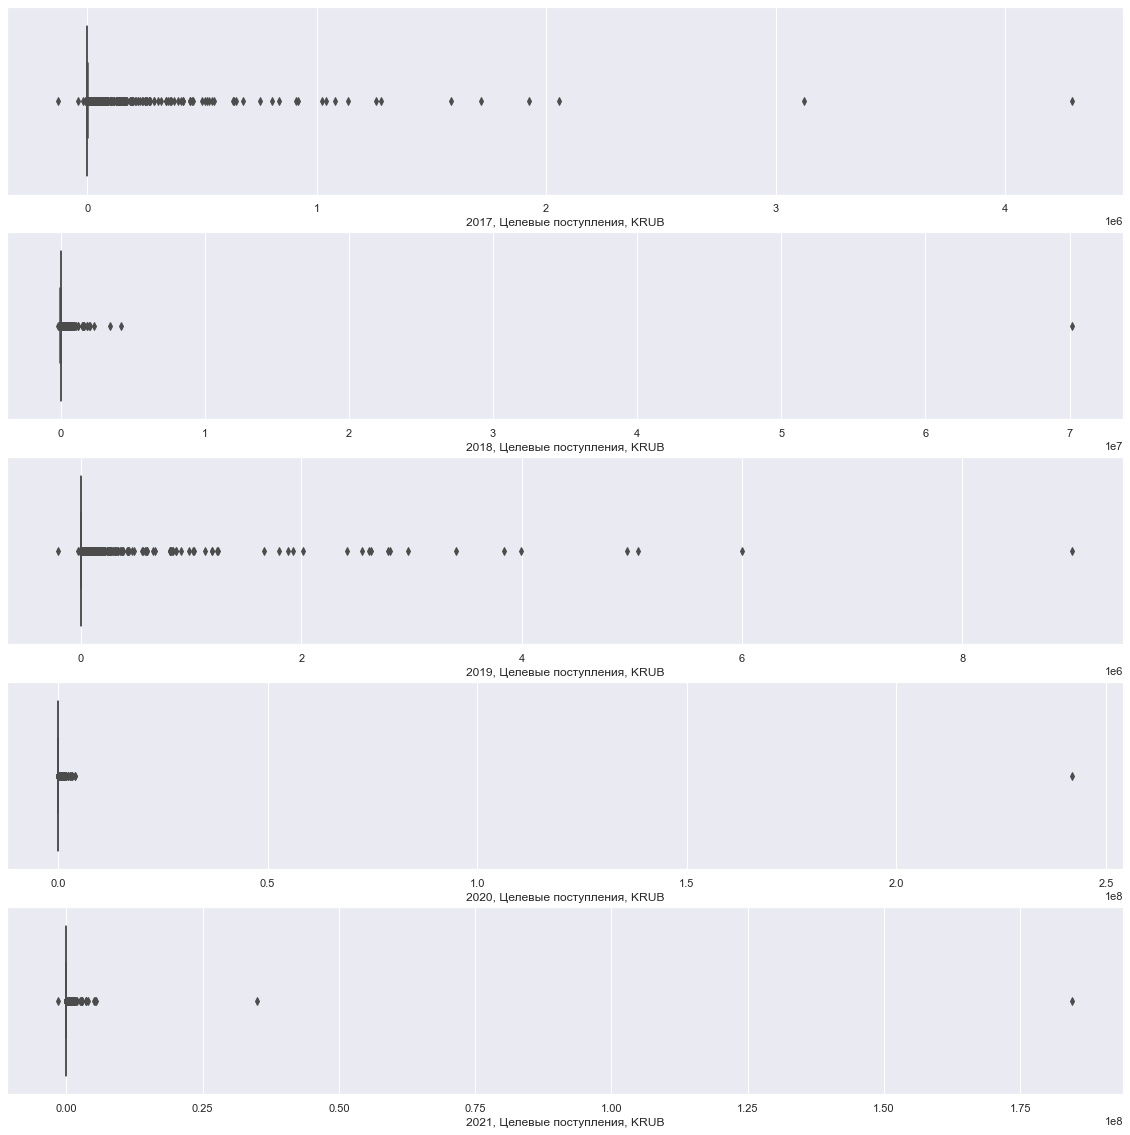

In [ ]:
col = [f'{i}, Целевые поступления, KRUB' for i in range(2017, 2022) ]

fig, ax = plt.subplots(5, 1, figsize=(20,20))

for i in range(5):
    sns.boxplot(x=data[col[i]], ax=ax[i])
plt.show()

In [ ]:
data[col].describe()

,"2017, Целевые поступления, KRUB","2018, Целевые поступления, KRUB","2019, Целевые поступления, KRUB","2020, Целевые поступления, KRUB","2021, Целевые поступления, KRUB"
count,6282.00,6282.00,6282.00,6282.00,6282.00
mean,10616.50,24815.11,20543.96,59125.63,59175.93
std,98777.20,893055.78,218878.28,3057206.16,2378757.43
min,-128145.00,-178738.00,-209219.00,-24446.00,-1519367.00
25%,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,3.00,12.00,18.00
75%,713.25,1234.50,1422.25,1646.00,1852.75
max,4293459.00,70198191.00,9000000.00,241986640.00,184577693.00


Странно, что есть отрицательные значения финансирования. Наверно ошибка. Или был возврат целевых поступлений, или ошибки при заполнении формы? каждыйгод это порядка 104-187 (за 5 лет 429 организаций)

У 50% организаций отсутствуют целевые поступления. А это являетс основным источником поступления денежных средст для НКО. Так же есть несколько организаций с очень большими поступленими. 

In [ ]:
data.sort_values('2017, Целевые поступления, KRUB', ascending=False)[
    ["2017, Целевые поступления, KRUB", "2017, Прибыль от приносящей доход деятельности, KRUB",\
     "2017, Всего поступило средств, KRUB"]][:10]

,"2017, Целевые поступления, KRUB","2017, Прибыль от приносящей доход деятельности, KRUB","2017, Всего поступило средств, KRUB"
1107,4293459.00,11535.00,4304994.00
5920,3124900.00,101382.00,3226282.00
1055,2057078.00,27412.00,2084490.00
1276,1923231.00,0.00,1923231.00
665,1715385.00,0.00,1715385.00
1259,1585261.00,0.00,1585261.00
3525,1279853.00,6732.00,1286585.00
2521,1256400.00,0.00,1256400.00
1502,1136329.00,261132.00,1397461.00
2361,1080249.00,17332.00,1097581.00


In [ ]:
data[(data['2017, Целевые поступления, KRUB']<0) & (data['2018, Целевые поступления, KRUB']<0) & 
    (data['2019, Целевые поступления, KRUB']<0) & (data['2020, Целевые поступления, KRUB']<0) & 
    (data['2021, Целевые поступления, KRUB']<0)][["2017, Всего поступило средств, KRUB", "2017, Прибыль от приносящей доход деятельности, KRUB"]]

,"2017, Всего поступило средств, KRUB","2017, Прибыль от приносящей доход деятельности, KRUB"
760,0.00,11.00
1332,0.00,100.00
1819,0.00,415.00
1823,0.00,1615.00
3628,20.00,1403.00
4843,0.00,201.00
4994,0.00,216.00
5982,0.00,23.00
6127,0.00,50.00
6220,0.00,9926.00


In [ ]:
# Всегда отрицательная
mask = data[(data['2017, Целевые поступления, KRUB']<0) & (data['2018, Целевые поступления, KRUB']<0) & 
    (data['2019, Целевые поступления, KRUB']<0) & (data['2020, Целевые поступления, KRUB']<0) & 
    (data['2021, Целевые поступления, KRUB']<0)]
display(mask)
print(len(mask))

,Наименование,Регистрационный номер,Дата регистрации,Статус,Код налогоплательщика,Регион регистрации,Код ОКАТО,Наименование ОКАТО,Код ОКТМО,Организационно-правовая форма,Код ОКОПФ,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2017, Дебиторская задолженность, KRUB","2018, Дебиторская задолженность, KRUB","2019, Дебиторская задолженность, KRUB","2020, Дебиторская задолженность, KRUB","2021, Дебиторская задолженность, KRUB","2017, Денежные средства и денежные эквиваленты, KRUB","2018, Денежные средства и денежные эквиваленты, KRUB","2019, Денежные средства и денежные эквиваленты, KRUB","2020, Денежные средства и денежные эквиваленты, KRUB","2021, Денежные средства и денежные эквиваленты, KRUB","2017, Капитал и резервы, KRUB","2018, Капитал и резервы, KRUB","2019, Капитал и резервы, KRUB","2020, Капитал и резервы, KRUB","2021, Капитал и резервы, KRUB","2017, Заёмные средства (краткосрочные), KRUB","2018, Заёмные средства (краткосрочные), KRUB","2019, Заёмные средства (краткосрочные), KRUB","2020, Заёмные средства (краткосрочные), KRUB","2021, Заёмные средства (краткосрочные), KRUB","2017, Кредиторская задолженность, KRUB","2018, Кредиторская задолженность, KRUB","2019, Кредиторская задолженность, KRUB","2020, Кредиторская задолженность, KRUB","2021, Кредиторская задолженность, KRUB","2017, Пассивы всего, KRUB","2018, Пассивы всего, KRUB","2019, Пассивы всего, KRUB","2020, Пассивы всего, KRUB","2021, Пассивы всего, KRUB","2017, Выручка, KRUB","2018, Выручка, KRUB","2019, Выручка, KRUB","2020, Выручка, KRUB","2021, Выручка, KRUB","2017, Себестоимость продаж, KRUB","2018, Себестоимость продаж, KRUB","2019, Себестоимость продаж, KRUB","2020, Себестоимость продаж, KRUB","2021, Себестоимость продаж, KRUB","2017, Валовая прибыль (убыток), KRUB","2018, Валовая прибыль (убыток), KRUB","2019, Валовая прибыль (убыток), KRUB","2020, Валовая прибыль (убыток), KRUB","2021, Валовая прибыль (убыток), KRUB","2017, Коммерческие расходы, KRUB","2018, Коммерческие расходы, KRUB","2019, Коммерческие расходы, KRUB","2020, Коммерческие расходы, KRUB","2021, Коммерческие расходы, KRUB","2017, Управленческие расходы, KRUB","2018, Управленческие расходы, KRUB","2019, Управленческие расходы, KRUB","2020, Управленческие расходы, KRUB","2021, Управленческие расходы, KRUB","2017, Прибыль (убыток) от продажи, KRUB","2018, Прибыль (убыток) от продажи, KRUB","2019, Прибыль (убыток) от продажи, KRUB","2020, Прибыль (убыток) от продажи, KRUB","2021, Прибыль (убыток) от продажи, KRUB","2017, Доходы от участия в других организациях, KRUB","2018, Доходы от участия в других организациях, KRUB","2019, Доходы от участия в других организациях, KRUB","2020, Доходы от участия в других организациях, KRUB","2021, Доходы от участия в других организациях, KRUB","2017, Проценты к получению, KRUB","2018, Проценты к получению, KRUB","2019, Проценты к получению, KRUB","2020, Проценты к получению, KRUB","2021, Проценты к получению, KRUB","2017, Проценты к уплате, KRUB","2018, Проценты к уплате, KRUB","2019, Проценты к уплате, KRUB","2020, Проценты к уплате, KRUB","2021, Проценты к уплате, KRUB","2017, Прочие доходы, KRUB","2018, Прочие доходы, KRUB","2019, Прочие доходы, KRUB","2020, Прочие доходы, KRUB","2021, Прочие доходы, KRUB","2017, Прочие расходы, KRUB","2018, Прочие расходы, KRUB","2019, Прочие расходы, KRUB","2020, Прочие расходы, KRUB","2021, Прочие расходы, KRUB","2017, Прибыль (убыток) до налогообложения , KRUB","2018, Прибыль (убыток) до налогообложения , KRUB","2019, Прибыль (убыток) до налогообложения , KRUB","2020, Прибыль (убыток) до налогообложения , KRUB","2021, Прибыль (убыток) до налогообложения , KRUB","2017, Текущий налог на прибыль, KRUB","2018, Текущий налог на прибыль, KRUB","2019, Текущий налог на прибыль, KRUB","2020, Текущий налог на прибыль, KRUB","2021, Текущий налог на прибыль, KRUB","2017, Чистая прибыль (убыток), KRUB","2018, Чистая прибыль (убыток), KRUB","2019, Чистая прибыль (убыток), KRUB","2020, 

10


In [ ]:
# удалим эти компании
data.drop(mask.index, axis=0, inplace=True)

In [ ]:
# Хоть раз  отрицательная
mask = data[(data['2017, Целевые поступления, KRUB']<0) | (data['2018, Целевые поступления, KRUB']<0) | 
    (data['2019, Целевые поступления, KRUB']<0) | (data['2020, Целевые поступления, KRUB']<0) | 
    (data['2021, Целевые поступления, KRUB']<0)]
display(mask)
print(len(mask))

,Наименование,Регистрационный номер,Дата регистрации,Статус,Код налогоплательщика,Регион регистрации,Код ОКАТО,Наименование ОКАТО,Код ОКТМО,Организационно-правовая форма,Код ОКОПФ,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2017, Дебиторская задолженность, KRUB","2018, Дебиторская задолженность, KRUB","2019, Дебиторская задолженность, KRUB","2020, Дебиторская задолженность, KRUB","2021, Дебиторская задолженность, KRUB","2017, Денежные средства и денежные эквиваленты, KRUB","2018, Денежные средства и денежные эквиваленты, KRUB","2019, Денежные средства и денежные эквиваленты, KRUB","2020, Денежные средства и денежные эквиваленты, KRUB","2021, Денежные средства и денежные эквиваленты, KRUB","2017, Капитал и резервы, KRUB","2018, Капитал и резервы, KRUB","2019, Капитал и резервы, KRUB","2020, Капитал и резервы, KRUB","2021, Капитал и резервы, KRUB","2017, Заёмные средства (краткосрочные), KRUB","2018, Заёмные средства (краткосрочные), KRUB","2019, Заёмные средства (краткосрочные), KRUB","2020, Заёмные средства (краткосрочные), KRUB","2021, Заёмные средства (краткосрочные), KRUB","2017, Кредиторская задолженность, KRUB","2018, Кредиторская задолженность, KRUB","2019, Кредиторская задолженность, KRUB","2020, Кредиторская задолженность, KRUB","2021, Кредиторская задолженность, KRUB","2017, Пассивы всего, KRUB","2018, Пассивы всего, KRUB","2019, Пассивы всего, KRUB","2020, Пассивы всего, KRUB","2021, Пассивы всего, KRUB","2017, Выручка, KRUB","2018, Выручка, KRUB","2019, Выручка, KRUB","2020, Выручка, KRUB","2021, Выручка, KRUB","2017, Себестоимость продаж, KRUB","2018, Себестоимость продаж, KRUB","2019, Себестоимость продаж, KRUB","2020, Себестоимость продаж, KRUB","2021, Себестоимость продаж, KRUB","2017, Валовая прибыль (убыток), KRUB","2018, Валовая прибыль (убыток), KRUB","2019, Валовая прибыль (убыток), KRUB","2020, Валовая прибыль (убыток), KRUB","2021, Валовая прибыль (убыток), KRUB","2017, Коммерческие расходы, KRUB","2018, Коммерческие расходы, KRUB","2019, Коммерческие расходы, KRUB","2020, Коммерческие расходы, KRUB","2021, Коммерческие расходы, KRUB","2017, Управленческие расходы, KRUB","2018, Управленческие расходы, KRUB","2019, Управленческие расходы, KRUB","2020, Управленческие расходы, KRUB","2021, Управленческие расходы, KRUB","2017, Прибыль (убыток) от продажи, KRUB","2018, Прибыль (убыток) от продажи, KRUB","2019, Прибыль (убыток) от продажи, KRUB","2020, Прибыль (убыток) от продажи, KRUB","2021, Прибыль (убыток) от продажи, KRUB","2017, Доходы от участия в других организациях, KRUB","2018, Доходы от участия в других организациях, KRUB","2019, Доходы от участия в других организациях, KRUB","2020, Доходы от участия в других организациях, KRUB","2021, Доходы от участия в других организациях, KRUB","2017, Проценты к получению, KRUB","2018, Проценты к получению, KRUB","2019, Проценты к получению, KRUB","2020, Проценты к получению, KRUB","2021, Проценты к получению, KRUB","2017, Проценты к уплате, KRUB","2018, Проценты к уплате, KRUB","2019, Проценты к уплате, KRUB","2020, Проценты к уплате, KRUB","2021, Проценты к уплате, KRUB","2017, Прочие доходы, KRUB","2018, Прочие доходы, KRUB","2019, Прочие доходы, KRUB","2020, Прочие доходы, KRUB","2021, Прочие доходы, KRUB","2017, Прочие расходы, KRUB","2018, Прочие расходы, KRUB","2019, Прочие расходы, KRUB","2020, Прочие расходы, KRUB","2021, Прочие расходы, KRUB","2017, Прибыль (убыток) до налогообложения , KRUB","2018, Прибыль (убыток) до налогообложения , KRUB","2019, Прибыль (убыток) до налогообложения , KRUB","2020, Прибыль (убыток) до налогообложения , KRUB","2021, Прибыль (убыток) до налогообложения , KRUB","2017, Текущий налог на прибыль, KRUB","2018, Текущий налог на прибыль, KRUB","2019, Текущий налог на прибыль, KRUB","2020, Текущий налог на прибыль, KRUB","2021, Текущий налог на прибыль, KRUB","2017, Чистая прибыль (убыток), KRUB","2018, Чистая прибыль (убыток), KRUB","2019, Чистая прибыль (убыток), KRUB","2020, 

419


In [ ]:
# удалим эти компании
data.drop(mask.index, axis=0, inplace=True)

In [ ]:
data.shape

(5853, 164)

***Мы еще удалили 419 компаний из-за некорректных данных в отчетности***

In [ ]:
# # Заменим на 0
# col = [f'{i}, Целевые поступления, KRUB' for i in range(2017, 2022) ]

# for el in col:
#     data[el] = data[el].apply(lambda i: 0 if i<0 else i) 

Но в расчетах пока этот показатель ранее у нас фигурировал только в кластеризации. Если использовать разбиение по ней, то надо выше переводить в 0 или удалять эти объекты. Мы решили удалить

## Кластеризация

In [ ]:
df = data.iloc[:,13:]

In [ ]:
df.shape

(5853, 151)

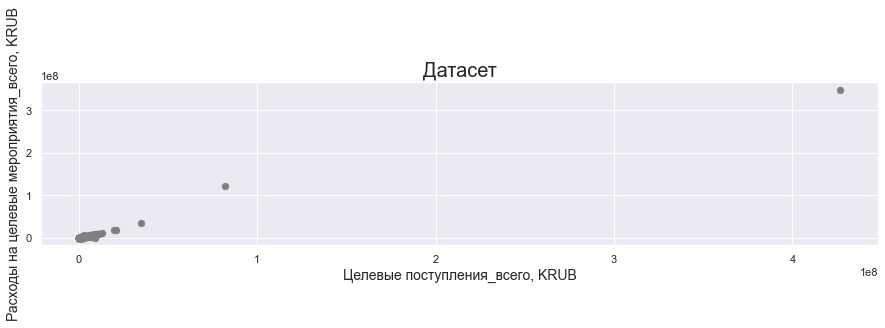

In [ ]:
plt.figure(figsize=(15, 3))
plt.scatter(df.loc[:, "Целевые поступления_всего, KRUB"], df.loc[:,
            "Расходы на целевые мероприятия_всего, KRUB"], s=40, color='grey')
plt.title('Датасет', fontsize=20)
plt.xlabel('Целевые поступления_всего, KRUB', fontsize=14)
plt.ylabel('Расходы на целевые мероприятия_всего, KRUB', fontsize=14)
plt.show()

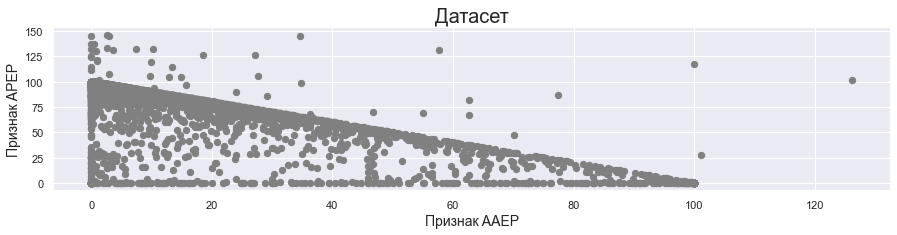

In [ ]:
plt.figure(figsize = (15, 3))
plt.scatter(df.loc[:, "AAEP"], df.loc[:, "APEP"], s = 40, color = 'grey')
plt.title('Датасет', fontsize = 20)
plt.xlabel('Признак AAEP', fontsize = 14)
plt.ylabel('Признак APEP', fontsize = 14)
plt.show()

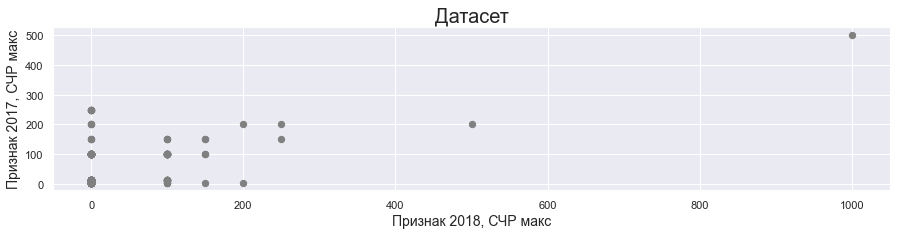

In [ ]:
plt.figure(figsize = (15, 3))
plt.scatter(df.loc[:, "2018, СЧР макс"], df.loc[:, "2017, СЧР_пред макс"], s = 40, color = 'grey')
plt.title('Датасет', fontsize = 20)
plt.xlabel('Признак 2018, СЧР макс', fontsize = 14)
plt.ylabel('Признак 2017, СЧР макс', fontsize = 14)
plt.show()

### K-means

In [ ]:
df.drop("2017, СЧР_предсказанная", axis=1, inplace=True)

In [ ]:
# импортируем необходимый класс из модуля preprocessing библиотеки sklearn
from sklearn.preprocessing import StandardScaler
 
# создадим объект этого класса
scaler = StandardScaler()
 
# приведем данные к единому масштабу 
df_scaled = scaler.fit_transform(df)
 
# заново создадим датафрейм с нормализованными значениями
df_scaled = pd.DataFrame(df_scaled, columns = df.columns)
 
# посмотрим на первые пять строк
df_scaled.round(2).head()

,"2017, Дебиторская задолженность, KRUB","2018, Дебиторская задолженность, KRUB","2019, Дебиторская задолженность, KRUB","2020, Дебиторская задолженность, KRUB","2021, Дебиторская задолженность, KRUB","2017, Денежные средства и денежные эквиваленты, KRUB","2018, Денежные средства и денежные эквиваленты, KRUB","2019, Денежные средства и денежные эквиваленты, KRUB","2020, Денежные средства и денежные эквиваленты, KRUB","2021, Денежные средства и денежные эквиваленты, KRUB","2017, Капитал и резервы, KRUB","2018, Капитал и резервы, KRUB","2019, Капитал и резервы, KRUB","2020, Капитал и резервы, KRUB","2021, Капитал и резервы, KRUB","2017, Заёмные средства (краткосрочные), KRUB","2018, Заёмные средства (краткосрочные), KRUB","2019, Заёмные средства (краткосрочные), KRUB","2020, Заёмные средства (краткосрочные), KRUB","2021, Заёмные средства (краткосрочные), KRUB","2017, Кредиторская задолженность, KRUB","2018, Кредиторская задолженность, KRUB","2019, Кредиторская задолженность, KRUB","2020, Кредиторская задолженность, KRUB","2021, Кредиторская задолженность, KRUB","2017, Пассивы всего, KRUB","2018, Пассивы всего, KRUB","2019, Пассивы всего, KRUB","2020, Пассивы всего, KRUB","2021, Пассивы всего, KRUB","2017, Выручка, KRUB","2018, Выручка, KRUB","2019, Выручка, KRUB","2020, Выручка, KRUB","2021, Выручка, KRUB","2017, Себестоимость продаж, KRUB","2018, Себестоимость продаж, KRUB","2019, Себестоимость продаж, KRUB","2020, Себестоимость продаж, KRUB","2021, Себестоимость продаж, KRUB","2017, Валовая прибыль (убыток), KRUB","2018, Валовая прибыль (убыток), KRUB","2019, Валовая прибыль (убыток), KRUB","2020, Валовая прибыль (убыток), KRUB","2021, Валовая прибыль (убыток), KRUB","2017, Коммерческие расходы, KRUB","2018, Коммерческие расходы, KRUB","2019, Коммерческие расходы, KRUB","2020, Коммерческие расходы, KRUB","2021, Коммерческие расходы, KRUB","2017, Управленческие расходы, KRUB","2018, Управленческие расходы, KRUB","2019, Управленческие расходы, KRUB","2020, Управленческие расходы, KRUB","2021, Управленческие расходы, KRUB","2017, Прибыль (убыток) от продажи, KRUB","2018, Прибыль (убыток) от продажи, KRUB","2019, Прибыль (убыток) от продажи, KRUB","2020, Прибыль (убыток) от продажи, KRUB","2021, Прибыль (убыток) от продажи, KRUB","2017, Доходы от участия в других организациях, KRUB","2018, Доходы от участия в других организациях, KRUB","2019, Доходы от участия в других организациях, KRUB","2020, Доходы от участия в других организациях, KRUB","2021, Доходы от участия в других организациях, KRUB","2017, Проценты к получению, KRUB","2018, Проценты к получению, KRUB","2019, Проценты к получению, KRUB","2020, Проценты к получению, KRUB","2021, Проценты к получению, KRUB","2017, Проценты к уплате, KRUB","2018, Проценты к уплате, KRUB","2019, Проценты к уплате, KRUB","2020, Проценты к уплате, KRUB","2021, Проценты к уплате, KRUB","2017, Прочие доходы, KRUB","2018, Прочие доходы, KRUB","2019, Прочие доходы, KRUB","2020, Прочие доходы, KRUB","2021, Прочие доходы, KRUB","2017, Прочие расходы, KRUB","2018, Прочие расходы, KRUB","2019, Прочие расходы, KRUB","2020, Прочие расходы, KRUB","2021, Прочие расходы, KRUB","2017, Прибыль (убыток) до налогообложения , KRUB","2018, Прибыль (убыток) до налогообложения , KRUB","2019, Прибыль (убыток) до налогообложения , KRUB","2020, Прибыль (убыток) до налогообложения , KRUB","2021, Прибыль (убыток) до налогообложения , KRUB","2017, Текущий налог на прибыль, KRUB","2018, Текущий налог на прибыль, KRUB","2019, Текущий налог на прибыль, KRUB","2020, Текущий налог на прибыль, KRUB","2021, Текущий налог на прибыль, KRUB","2017, Чистая прибыль (убыток), KRUB","2018, Чистая прибыль (убыток), KRUB","2019, Чистая прибыль (убыток), KRUB","2020, Чистая прибыль (убыток), KRUB","2021, Чистая прибыль (убыток), KRUB","2017, Прибыль от приносящей доход деятельности, KRUB","2018, Прибыль от приносящей доход деятельности, KRUB","2019, Прибыль от приносящей доход деятельности, KRUB","2020, Прибыль от приносящей доход деят

In [ ]:
# оставим все признаки и для наглядности поместим наши данные в переменную Х
# целевой переменной у нас разумеется нет
X = df_scaled

Text(0, 0.5, 'WCSS')

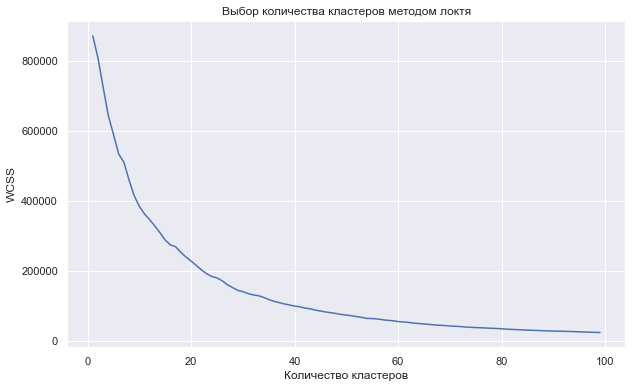

In [ ]:
# импортируем нужный класс
from sklearn.cluster import KMeans
 
# создадим пустой список для записи показателя WCSS (нашей ошибки)
wcss = []
 

# в данном случае числа от 1 до 100
for i in range(1, 100):
    
    # настроим параметры модели 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
 
    # обучим модель на наших данных с разным количеством кластеров
    kmeans.fit(X)
 
    # для каждого кластера рассчитаем ошибку (атрибут inertia_) и поместим в список
    wcss.append(kmeans.inertia_)

# зададим размер график
plt.figure(figsize = (10,6))
# передадим функции plot() последовательность кластеров и ошибку WCSS
plt.plot(range(1, 100), wcss)
# и добавим подписи
plt.title('Выбор количества кластеров методом локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')

На 60 кластерах ошибка уже незначительно уменьшается

In [ ]:
# заново обучим модель с 60 кластерами
kmeans = KMeans(n_clusters = 60, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
# обучение и прогноз в данном случае можно сделать одним методом .fit_predict()
y_pred = kmeans.fit_predict(X)

unique, counts = np.unique(kmeans.labels_, return_counts=True)
dict_val = dict(zip(unique, counts))
dict_val

{0: 1550,
 1: 1,
 2: 1,
 3: 1,
 4: 1,
 5: 1,
 6: 1,
 7: 1,
 8: 1,
 9: 1,
 10: 1,
 11: 1,
 12: 1,
 13: 1,
 14: 1,
 15: 1,
 16: 1,
 17: 1,
 18: 11,
 19: 1,
 20: 39,
 21: 1,
 22: 1,
 23: 2370,
 24: 4,
 25: 1,
 26: 1,
 27: 625,
 28: 1,
 29: 1,
 30: 5,
 31: 1,
 32: 2,
 33: 1,
 34: 4,
 35: 1092,
 36: 1,
 37: 2,
 38: 1,
 39: 1,
 40: 1,
 41: 1,
 42: 1,
 43: 1,
 44: 1,
 45: 1,
 46: 52,
 47: 1,
 48: 1,
 49: 4,
 50: 1,
 51: 4,
 52: 1,
 53: 1,
 54: 2,
 55: 3,
 56: 1,
 57: 1,
 58: 2,
 59: 40}

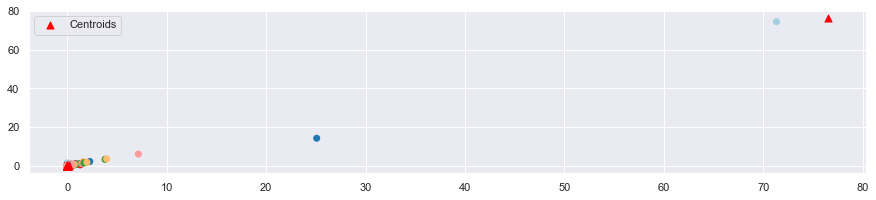

In [ ]:
plt.figure(figsize = (15,3))
 
# снова построим точечную диаграмму, но коды точек возьмем из y_pred
plt.scatter(X.iloc[:,-1], X.iloc[:,-2], c = y_pred, cmap='Paired')# на целевых расходах и целевых поступлениях
 
# кроме того выведем центроиды с помощью атрибута cluster_centers_
# зададим размер s = 50, красный цвет c = 'red', тип маркера - треугольник, и подпись
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 50, c = 'red', marker = '^', label = 'Centroids')
 
# укажем, где разместить легенду
plt.legend(loc = 'upper left');

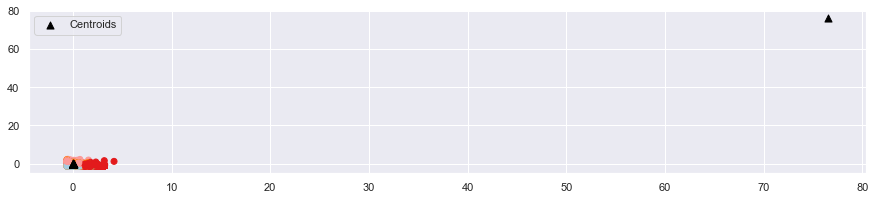

In [ ]:
plt.figure(figsize = (15,3))
 
# снова построим точечную диаграмму, но коды точек возьмем из y_pred
plt.scatter(X.iloc[:,-3], X.iloc[:,-4], c = y_pred, cmap='Paired')# на APEP и AAEP
 
# кроме того выведем центроиды с помощью атрибута cluster_centers_
# зададим размер s = 50, красный цвет c = 'black', тип маркера - треугольник, и подпись
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 50, c = 'black', marker = '^', label = 'Centroids')
 
# укажем, где разместить легенду
plt.legend(loc = 'upper left');

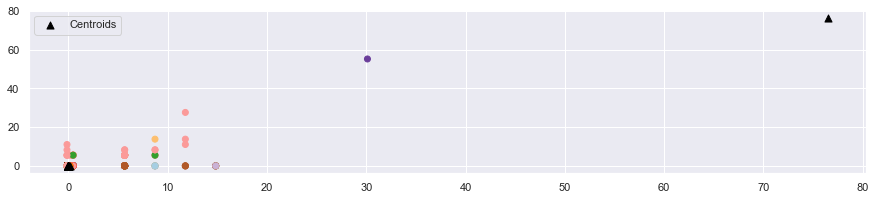

In [ ]:
plt.figure(figsize = (15,3))
 
# снова построим точечную диаграмму, но коды точек возьмем из y_pred
plt.scatter(X.iloc[:,-11], X.iloc[:,-10], c = y_pred, cmap='Paired')# 2017, СЧР_пред макс и 2018, СЧР макс
 
# кроме того выведем центроиды с помощью атрибута cluster_centers_
# зададим размер s = 50, красный цвет c = 'black', тип маркера - треугольник, и подпись
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 50, c = 'black', marker = '^', label = 'Centroids')
 
# укажем, где разместить легенду
plt.legend(loc = 'upper left');

### DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

dbscan_2var_0 = DBSCAN()
dbscan_2var_0.fit(df.loc[:, "2017, СЧР_пред макс"].values.reshape(-1, 1), df.loc[:, "2018, СЧР макс"].values.reshape(-1, 1))

print(np.unique(dbscan_2var_0.labels_))
unique, counts = np.unique(dbscan_2var_0.labels_, return_counts=True)
dict(zip(unique, counts))

[-1  0  1  2  3  4  5  6]


{-1: 1, 0: 164, 1: 5435, 2: 171, 3: 61, 4: 6, 5: 9, 6: 6}

In [ ]:
#from sklearn.cluster import DBSCAN

dbscan_2var_1 = DBSCAN()
dbscan_2var_1.fit(df.loc[:, "AAEP"].values.reshape(-1, 1), df.loc[:, "APEP"].values.reshape(-1, 1))

print(np.unique(dbscan_2var_1.labels_))
unique, counts = np.unique(dbscan_2var_1.labels_, return_counts=True)
dict(zip(unique, counts))

[-1  0  1  2  3  4  5  6  7  8  9 10 11]


{-1: 15,
 0: 5308,
 1: 299,
 2: 17,
 3: 22,
 4: 28,
 5: 84,
 6: 30,
 7: 17,
 8: 5,
 9: 15,
 10: 8,
 11: 5}

In [ ]:
dbscan_all = DBSCAN()
dbscan_all.fit(df)

print(np.unique(dbscan_all.labels_))
unique, counts = np.unique(dbscan_all.labels_, return_counts=True)
dict(zip(unique, counts))

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


{-1: 5624,
 0: 9,
 1: 16,
 2: 13,
 3: 6,
 4: 7,
 5: 27,
 6: 22,
 7: 16,
 8: 20,
 9: 6,
 10: 5,
 11: 13,
 12: 10,
 13: 11,
 14: 14,
 15: 11,
 16: 5,
 17: 5,
 18: 5,
 19: 8}

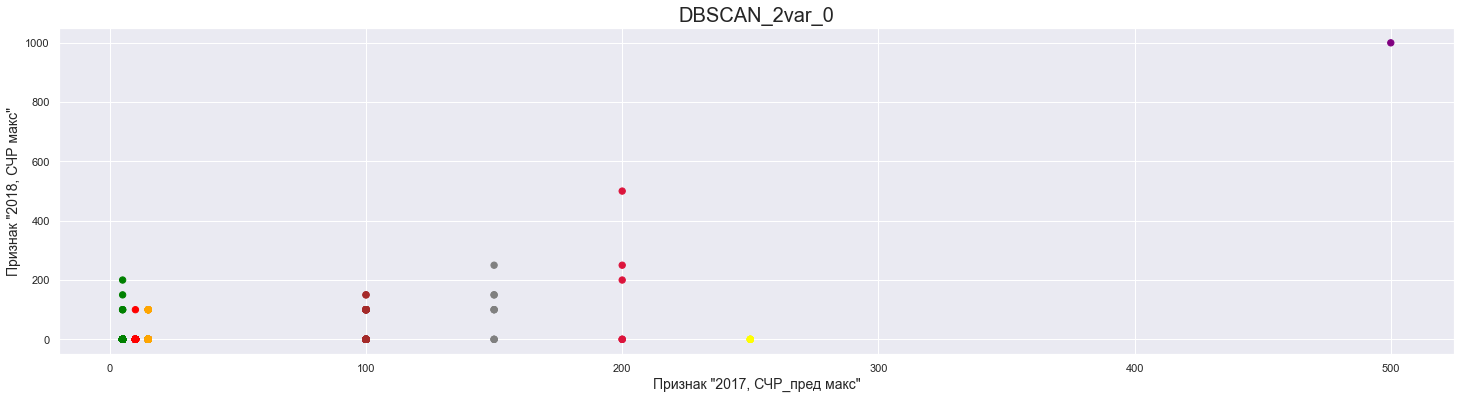

In [ ]:
import matplotlib
from matplotlib.colors import ListedColormap
colors = ['purple', 'red', 'blue', 'green', 'orange',
          'black', 'brown', 'yellow', 'pink', 'gray', 'crimson']
df['DBSCAN_labels_2var_0'] = dbscan_2var_0.labels_

# Отобразим точки на графике
plt.figure(figsize=(25, 6))
plt.scatter(df.loc[:, "2017, СЧР_пред макс"], df.loc[:, "2018, СЧР макс"],
            c=df['DBSCAN_labels_2var_0'], cmap=matplotlib.colors.ListedColormap(colors), s=40)
plt.title('DBSCAN_2var_0', fontsize=20)
plt.xlabel('Признак "2017, СЧР_пред макс"', fontsize=14)
plt.ylabel('Признак "2018, СЧР макс"', fontsize=14)
plt.show()

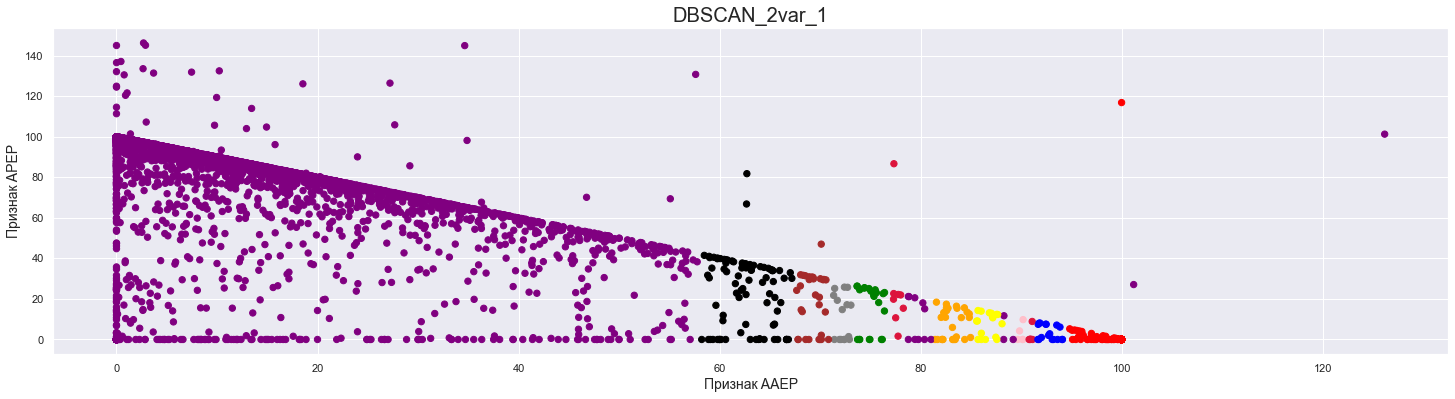

In [ ]:
# import matplotlib
# from matplotlib.colors import ListedColormap
colors = ['purple', 'red', 'blue', 'green', 'orange',
          'black', 'brown', 'yellow', 'pink', 'gray', 'crimson']
df['DBSCAN_labels_2var_1'] = dbscan_2var_1.labels_

# Отобразим точки на графике
plt.figure(figsize=(25, 6))
plt.scatter(df.loc[:, "AAEP"], df.loc[:, "APEP"], c=df['DBSCAN_labels_2var_1'],
            cmap=matplotlib.colors.ListedColormap(colors), s=40)
plt.title('DBSCAN_2var_1', fontsize=20)
plt.xlabel('Признак AAEP', fontsize=14)
plt.ylabel('Признак APEP', fontsize=14)
plt.show()

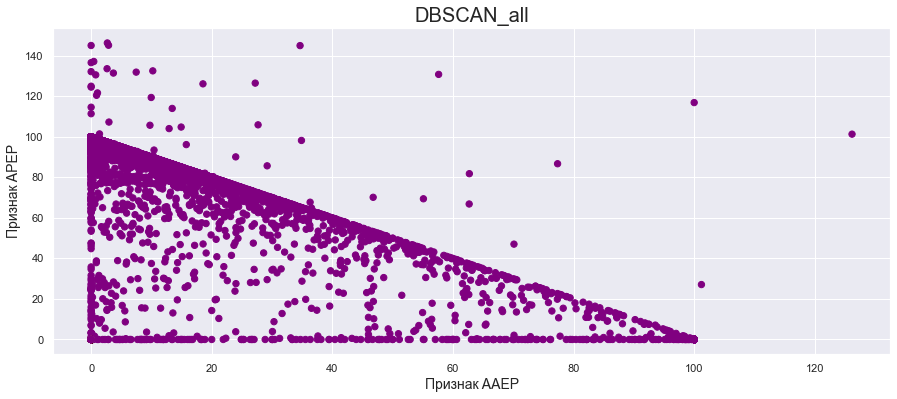

In [ ]:
df['DBSCAN_labels_all'] = dbscan_all.labels_

# Отобразим точки на графике
plt.figure(figsize=(15, 6))
plt.scatter(df.loc[:, "AAEP"], df.loc[:, "APEP"], c=df['DBSCAN_labels_all'],
            cmap=matplotlib.colors.ListedColormap(colors), s=40)
plt.title('DBSCAN_all', fontsize=20)
plt.xlabel('Признак AAEP', fontsize=14)
plt.ylabel('Признак APEP', fontsize=14)
plt.show()

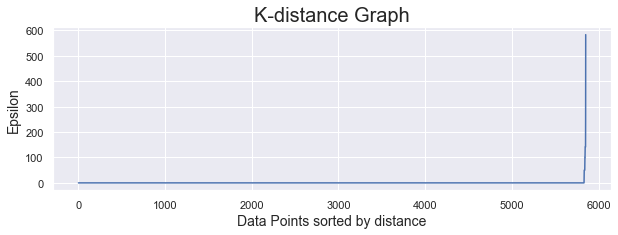

In [ ]:
neigh = NearestNeighbors(n_neighbors = 2)
nbrs = neigh.fit(df.loc[:,["2017, СЧР макс", "2018, СЧР макс"]])
distances, indices = nbrs.kneighbors(df.loc[:,["2017, СЧР_пред макс", "2018, СЧР макс"]])

# Отобразим график расстояний между точками
distances = np.sort(distances, axis = 0)
distances = distances[:, 1]
plt.figure(figsize = (10, 3))
plt.plot(distances)
plt.title('K-distance Graph', fontsize = 20)
plt.xlabel('Data Points sorted by distance', fontsize = 14)
plt.ylabel('Epsilon', fontsize = 14)
plt.show()

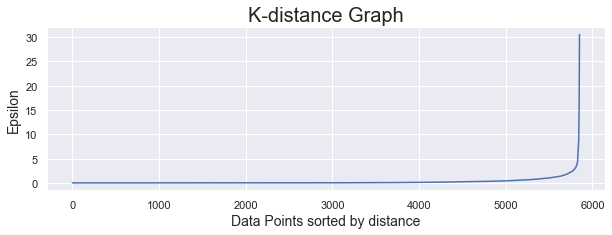

In [ ]:
neigh = NearestNeighbors(n_neighbors = 2)
nbrs = neigh.fit(df.loc[:,["AAEP", "APEP"]])
distances, indices = nbrs.kneighbors(df.loc[:,["AAEP", "APEP"]])

# Отобразим график расстояний между точками
distances = np.sort(distances, axis = 0)
distances = distances[:, 1]
plt.figure(figsize = (10, 3))
plt.plot(distances)
plt.title('K-distance Graph', fontsize = 20)
plt.xlabel('Data Points sorted by distance', fontsize = 14)
plt.ylabel('Epsilon', fontsize = 14)
plt.show()

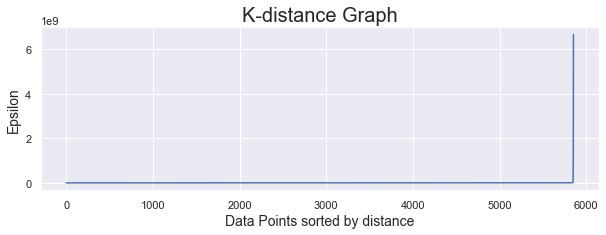

In [ ]:
neigh = NearestNeighbors(n_neighbors = 5)
nbrs = neigh.fit(df)
distances, indices = nbrs.kneighbors(df)

# Отобразим график расстояний между точками
distances = np.sort(distances, axis = 0)
distances = distances[:, 1]
plt.figure(figsize = (10, 3))
plt.plot(distances)
plt.title('K-distance Graph', fontsize = 20)
plt.xlabel('Data Points sorted by distance', fontsize = 14)
plt.ylabel('Epsilon', fontsize = 14)
plt.show()

In [ ]:
dbscan_opt_2var_0 = DBSCAN(eps=1, min_samples=15)
dbscan_opt_2var_0.fit(df.loc[:, "2017, СЧР_пред макс"].values.reshape(
    -1, 1), df.loc[:, "2018, СЧР макс"].values.reshape(-1, 1))

print(np.unique(dbscan_opt_2var_0.labels_))
unique, counts = np.unique(dbscan_opt_2var_0.labels_, return_counts=True)
dict(zip(unique, counts))

[-1  0  1  2  3]


{-1: 22, 0: 164, 1: 5435, 2: 171, 3: 61}

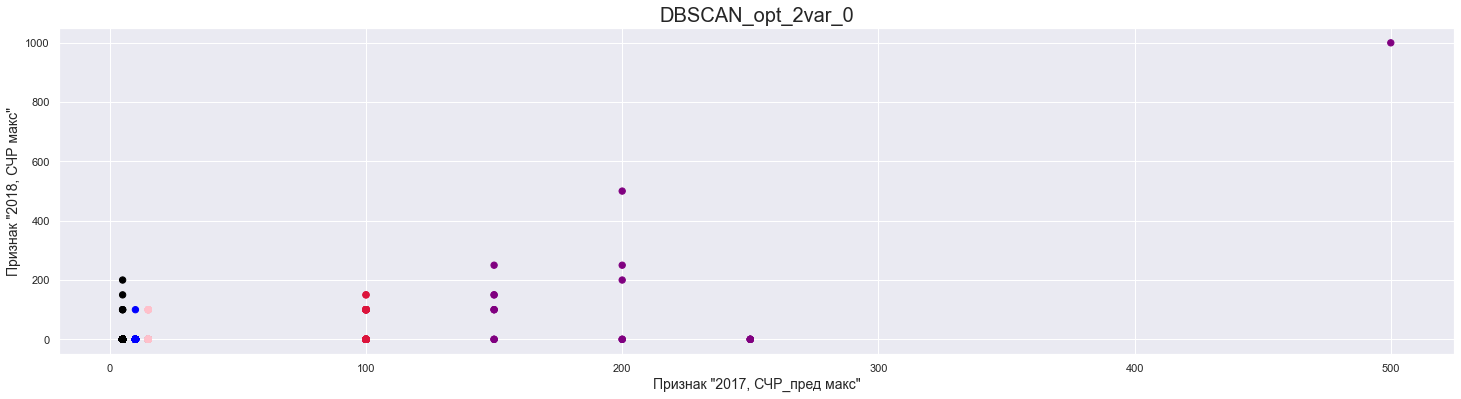

In [ ]:
df['DBSCAN_opt_labels_2var_0'] = dbscan_opt_2var_0.labels_
df['DBSCAN_opt_labels_2var_0'].value_counts()
# Обозначим кластеры разными цветами
colors = ['purple', 'red', 'blue', 'green', 'orange', 'black', 'brown', 'yellow', 'pink', 'gray', 'crimson']
#colors = ['purple', 'red', 'blue', 'green', 'orange', 'yellow']
# Отобразим точки на графике
plt.figure(figsize=(25, 6))
plt.scatter(df.loc[:, "2017, СЧР_пред макс"], df.loc[:, "2018, СЧР макс"],
            c=df['DBSCAN_opt_labels_2var_0'], cmap=matplotlib.colors.ListedColormap(colors), s=40)
plt.title('DBSCAN_opt_2var_0', fontsize=20)
plt.xlabel('Признак "2017, СЧР_пред макс"', fontsize=14)
plt.ylabel('Признак "2018, СЧР макс"', fontsize=14)
plt.show()

In [ ]:
dbscan_opt_2var_1 = DBSCAN(eps=0.9, min_samples=15)
dbscan_opt_2var_1.fit(df.loc[:, "AAEP"].values.reshape(-1, 1), df.loc[:, "APEP"].values.reshape(-1, 1))

print(np.unique(dbscan_opt_2var_1.labels_))
unique, counts = np.unique(dbscan_opt_2var_1.labels_, return_counts=True)
dict(zip(unique, counts))
#eps=3, min_samples=35→[-1  0  1]{-1: 4, 0: 5869, 1: 417}
#eps=2, min_samples=25→[-1  0  1  2]{-1: 13, 0: 5865, 1: 354, 2: 58}
#eps=1, min_samples=25→[-1  0  1  2  3]{-1: 334, 0: 5527, 1: 294, 2: 109, 3: 26}
#eps=0.9, min_samples=10→[-1  0  1  2  3  4]{-1: 15, 0: 5859, 1: 322, 2: 29, 3: 54, 4: 11}
#eps=0.5, min_samples=5→[-1  0  1  2  3  4  5  6  7  8  9]{-1: 13, 0: 5705, 1: 320, 2: 32, 3: 22, 4: 52, 5: 85, 6: 32, 7: 15, 8: 8, 9: 6}

[-1  0  1  2  3  4  5  6]


{-1: 104, 0: 5245, 1: 293, 2: 22, 3: 33, 4: 82, 5: 56, 6: 18}

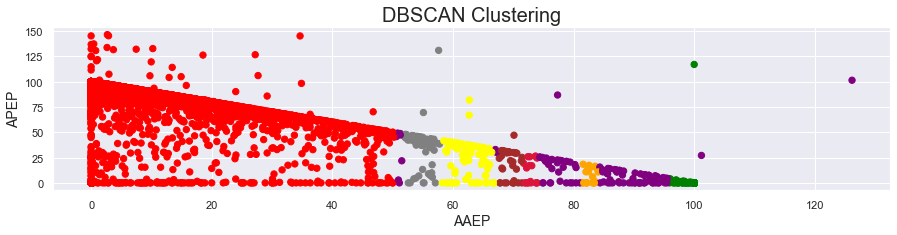

In [ ]:
df['DBSCAN_opt_labels_2var_1'] = dbscan_opt_2var_1.labels_
df['DBSCAN_opt_labels_2var_1'].value_counts()
# Обозначим кластеры разными цветами
colors = ['purple', 'red', 'blue', 'green', 'orange', 'black', 'brown', 'yellow', 'pink', 'gray', 'crimson']
#colors = ['purple', 'red', 'blue', 'green', 'orange', 'yellow']
plt.figure(figsize = (15, 3))
plt.scatter(df.loc[:, "AAEP"], df.loc[:, "APEP"], c = df['DBSCAN_opt_labels_2var_1'], cmap = matplotlib.colors.ListedColormap(colors), s = 40)
plt.title('DBSCAN Clustering', fontsize = 20)
plt.xlabel('AAEP',fontsize=14)
plt.ylabel('APEP',fontsize=14)
plt.show()

In [ ]:
dbscan_opt_all = DBSCAN(eps=0.9, min_samples=25)
dbscan_opt_all.fit(df)

print(np.unique(dbscan_opt_all.labels_))
unique, counts = np.unique(dbscan_opt_all.labels_, return_counts=True)
dict(zip(unique, counts))

[-1  0]


{-1: 5826, 0: 27}

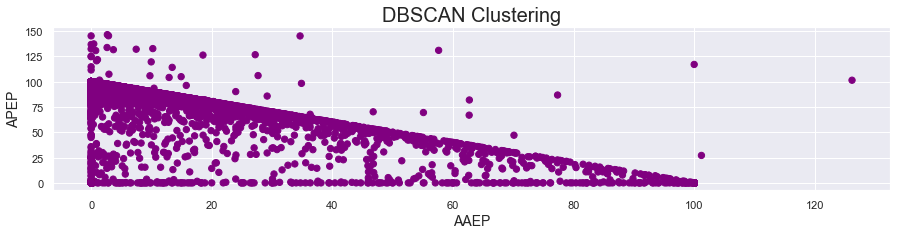

In [ ]:
df['DBSCAN_opt_labels_all'] = dbscan_opt_all.labels_
df['DBSCAN_opt_labels_all'].value_counts()
# Обозначим кластеры разными цветами
#colors = ['purple', 'red', 'blue', 'green', 'orange', 'black', 'brown', 'yellow', 'pink']
colors = ['purple', 'red', 'blue', 'green', 'orange', 'yellow']
plt.figure(figsize = (15, 3))
plt.scatter(df.loc[:, "AAEP"], df.loc[:, "APEP"], c = df['DBSCAN_opt_labels_all'], cmap = matplotlib.colors.ListedColormap(colors), s = 40)
plt.title('DBSCAN Clustering', fontsize = 20)
plt.xlabel('AAEP',fontsize=14)
plt.ylabel('APEP',fontsize=14)
plt.show()

***На наш взгляд наилучшее разделение было методом DBSCAN на дефолтных параметрах по 2-м признакам `"2017, СЧР_пред макс"` и `"2018, СЧР макс"`. Это метки `'DBSCAN_labels_2var_0'`***

In [ ]:
data.loc[:,"DBSCAN_labels_2var_0"] = df["DBSCAN_labels_2var_0"]
data.loc[:,"DBSCAN_opt_labels_2var_1"] = df["DBSCAN_opt_labels_2var_1"]
data.loc[:,"K_means_labels"] = kmeans.labels_

In [ ]:
data["DBSCAN_labels_2var_0"].unique(), data["DBSCAN_opt_labels_2var_1"].unique()

(array([ 0,  1,  2,  3,  4,  5,  6, -1], dtype=int64),
 array([ 0,  1, -1,  2,  4,  3,  5,  6], dtype=int64))

In [ ]:
data[data["DBSCAN_labels_2var_0"] == 2]

,Наименование,Регистрационный номер,Дата регистрации,Статус,Код налогоплательщика,Регион регистрации,Код ОКАТО,Наименование ОКАТО,Код ОКТМО,Организационно-правовая форма,Код ОКОПФ,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2017, Дебиторская задолженность, KRUB","2018, Дебиторская задолженность, KRUB","2019, Дебиторская задолженность, KRUB","2020, Дебиторская задолженность, KRUB","2021, Дебиторская задолженность, KRUB","2017, Денежные средства и денежные эквиваленты, KRUB","2018, Денежные средства и денежные эквиваленты, KRUB","2019, Денежные средства и денежные эквиваленты, KRUB","2020, Денежные средства и денежные эквиваленты, KRUB","2021, Денежные средства и денежные эквиваленты, KRUB","2017, Капитал и резервы, KRUB","2018, Капитал и резервы, KRUB","2019, Капитал и резервы, KRUB","2020, Капитал и резервы, KRUB","2021, Капитал и резервы, KRUB","2017, Заёмные средства (краткосрочные), KRUB","2018, Заёмные средства (краткосрочные), KRUB","2019, Заёмные средства (краткосрочные), KRUB","2020, Заёмные средства (краткосрочные), KRUB","2021, Заёмные средства (краткосрочные), KRUB","2017, Кредиторская задолженность, KRUB","2018, Кредиторская задолженность, KRUB","2019, Кредиторская задолженность, KRUB","2020, Кредиторская задолженность, KRUB","2021, Кредиторская задолженность, KRUB","2017, Пассивы всего, KRUB","2018, Пассивы всего, KRUB","2019, Пассивы всего, KRUB","2020, Пассивы всего, KRUB","2021, Пассивы всего, KRUB","2017, Выручка, KRUB","2018, Выручка, KRUB","2019, Выручка, KRUB","2020, Выручка, KRUB","2021, Выручка, KRUB","2017, Себестоимость продаж, KRUB","2018, Себестоимость продаж, KRUB","2019, Себестоимость продаж, KRUB","2020, Себестоимость продаж, KRUB","2021, Себестоимость продаж, KRUB","2017, Валовая прибыль (убыток), KRUB","2018, Валовая прибыль (убыток), KRUB","2019, Валовая прибыль (убыток), KRUB","2020, Валовая прибыль (убыток), KRUB","2021, Валовая прибыль (убыток), KRUB","2017, Коммерческие расходы, KRUB","2018, Коммерческие расходы, KRUB","2019, Коммерческие расходы, KRUB","2020, Коммерческие расходы, KRUB","2021, Коммерческие расходы, KRUB","2017, Управленческие расходы, KRUB","2018, Управленческие расходы, KRUB","2019, Управленческие расходы, KRUB","2020, Управленческие расходы, KRUB","2021, Управленческие расходы, KRUB","2017, Прибыль (убыток) от продажи, KRUB","2018, Прибыль (убыток) от продажи, KRUB","2019, Прибыль (убыток) от продажи, KRUB","2020, Прибыль (убыток) от продажи, KRUB","2021, Прибыль (убыток) от продажи, KRUB","2017, Доходы от участия в других организациях, KRUB","2018, Доходы от участия в других организациях, KRUB","2019, Доходы от участия в других организациях, KRUB","2020, Доходы от участия в других организациях, KRUB","2021, Доходы от участия в других организациях, KRUB","2017, Проценты к получению, KRUB","2018, Проценты к получению, KRUB","2019, Проценты к получению, KRUB","2020, Проценты к получению, KRUB",...,"2019, Проценты к уплате, KRUB","2020, Проценты к уплате, KRUB","2021, Проценты к уплате, KRUB","2017, Прочие доходы, KRUB","2018, Прочие доходы, KRUB","2019, Прочие доходы, KRUB","2020, Прочие доходы, KRUB","2021, Прочие доходы, KRUB","2017, Прочие расходы, KRUB","2018, Прочие расходы, KRUB","2019, Прочие расходы, KRUB","2020, Прочие расходы, KRUB","2021, Прочие расходы, KRUB","2017, Прибыль (убыток) до налогообложения , KRUB","2018, Прибыль (убыток) до налогообложения , KRUB","2019, Прибыль (убыток) до налогообложения , KRUB","2020, Прибыль (убыток) до налогообложения , KRUB","2021, Прибыль (убыток) до налогообложения , KRUB","2017, Текущий налог на прибыль, KRUB","2018, Текущий налог на прибыль, KRUB","2019, Текущий налог на прибыль, KRUB","2020, Текущий налог на прибыль, KRUB","2021, Текущий налог на прибыль, KRUB","2017, Чистая прибыль (убыток), KRUB","2018, Чистая прибыль (убыток), KRUB","2019, Чистая прибыль (убыток), KRUB","2020, Чистая прибыль (убыток), KRUB","2021, Чистая прибыль (убыток), KRUB","2017, Прибыль от приносящ

## Расчет коэффициентов

In [ ]:
# (1300+1400)/1700  1400-долгосрочныхзаймов нет у нас

# Коэффициент приближен к 1 показывает  насколько мало привлечено организацией кракосрочных займов. 
# Низкая доля краткосрочных заимствований называется финансовой устойчивостью.
# Показывает степень зависимости организации от внешнего финансирования и помогает спрогнозировать 
# ее платежеспособность в долгосрочной перспективе.  Оптимально 0,8-0,9

for y in range(2017,2022):
    data[f'{y}, Коэф финансовой устойчивости'] = data[f'{y}, Капитал и резервы, KRUB']\
                                                  /(data[f'{y}, Пассивы всего, KRUB']+1)
    

In [ ]:
# Показывает долю активов, который покрываются за счет собственного капитала. Чемы выше этот коэффициент, 
# тем лучше финансовое состояние компании. Норм больше 0,5

for y in range(2017,2022):
    data[f'{y}, Коэф финансовой независимости'] = data[f'{y}, Капитал и резервы, KRUB']\
                                                   /(data[f'{y}, Заёмные средства (краткосрочные), KRUB']+1)
    

In [ ]:
# Коэффициент текущей ликвидности CA/CL Оценка платежеспособности фонда
# CA – текущие активы (оборотные), CL – текущие обязательства (обязательства перед поставщиками услуг).

for y in range(2017,2022):
    data[f'{y}, Коэф текущей ликвидности'] = (data[f'{y}, Дебиторская задолженность, KRUB']
                                              +  data[f'{y}, Денежные средства и денежные эквиваленты, KRUB'])\
                                              /(data[f'{y}, Кредиторская задолженность, KRUB']+1)

In [ ]:
# Соотношение доходов и расходов FCE/FCI При значительном превышении расходов над доходами имеет смысл пересмотреть фандрайзинговую политику
# FCI – поступления в валюте, FCE – расходы в валюте

for y in range(2017,2022):
    data[f'{y}, Соотношение всех доходов и расходов'] = data[f'{y}, Всего использовано средств, KRUB']\
                                                        /(data[f'{y}, Всего поступило средств, KRUB']+1)

In [ ]:
# Индикатор сбережений (TI-TE)/TE
# Один из индикаторов устойчивого развития фонда (необходимо анализировать в динамике и в зависимости от типа фонда)
# TI – общие поступления, TE – общие расходы,

for y in range(2017,2022):
    data[f'{y}, Индикатор сбережений'] = (data[f'{y}, Всего поступило средств, KRUB'] 
                                          - data[f'{y}, Всего использовано средств, KRUB'])\
                                          /(data[f'{y}, Всего использовано средств, KRUB']+1)

In [ ]:
# Динамика расходов TE(t)/TE(t-1) Анализ динамики показателей иллюстрирует основные тенденции. 
for y in range(2017,2021):
    data[f'{y+1}/{y}, Динамика расходов'] = data[f'{y+1}, Всего использовано средств, KRUB']\
                                          /(data[f'{y}, Всего использовано средств, KRUB']+1)

In [ ]:
# Динамика доходов TI(t)/TI(t-1) Анализ динамики показателей иллюстрирует основные тенденции. 
for y in range(2017,2021):
    data[f'{y+1}/{y}, Динамика доходов'] = data[f'{y+1}, Всего поступило средств, KRUB']\
                                          /(data[f'{y}, Всего поступило средств, KRUB']+1)

In [ ]:
# Посчитаем усредненные значения следующих коэффициентов:

# Соотношение всех доходов и расходов
data["СДохРас_средн"] = data.apply(lambda x: round(sum(
    [x[str(i)+", Соотношение всех доходов и расходов"] for i in range(2017, 2022)])/5, 2), axis=1)

# Коэф финансовой устойчивости
data["К_фин_уст_средн"] = data.apply(lambda x: round(sum(
    [x[str(i)+", Коэф финансовой устойчивости"] for i in range(2017, 2022)])/5, 2), axis=1)

# Коэф финансовой независимости
data["К_фин_незав_средн"] = data.apply(lambda x: round(sum(
    [x[str(i)+", Коэф финансовой независимости"] for i in range(2017, 2022)])/5, 2), axis=1)

# Коэф текущей ликвидности
data["К_тек_ликв_средн"] = data.apply(lambda x: round(sum(
    [x[str(i)+", Коэф текущей ликвидности"] for i in range(2017, 2022)])/5, 2), axis=1)

# Индикатор сбережений
data["Инд_сбереж"] = data.apply(lambda x: round(sum(
    [x[str(i)+", Индикатор сбережений"] for i in range(2017, 2022)])/5, 2), axis=1)

In [ ]:
data.head(3)

,Наименование,Регистрационный номер,Дата регистрации,Статус,Код налогоплательщика,Регион регистрации,Код ОКАТО,Наименование ОКАТО,Код ОКТМО,Организационно-правовая форма,Код ОКОПФ,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2017, Дебиторская задолженность, KRUB","2018, Дебиторская задолженность, KRUB","2019, Дебиторская задолженность, KRUB","2020, Дебиторская задолженность, KRUB","2021, Дебиторская задолженность, KRUB","2017, Денежные средства и денежные эквиваленты, KRUB","2018, Денежные средства и денежные эквиваленты, KRUB","2019, Денежные средства и денежные эквиваленты, KRUB","2020, Денежные средства и денежные эквиваленты, KRUB","2021, Денежные средства и денежные эквиваленты, KRUB","2017, Капитал и резервы, KRUB","2018, Капитал и резервы, KRUB","2019, Капитал и резервы, KRUB","2020, Капитал и резервы, KRUB","2021, Капитал и резервы, KRUB","2017, Заёмные средства (краткосрочные), KRUB","2018, Заёмные средства (краткосрочные), KRUB","2019, Заёмные средства (краткосрочные), KRUB","2020, Заёмные средства (краткосрочные), KRUB","2021, Заёмные средства (краткосрочные), KRUB","2017, Кредиторская задолженность, KRUB","2018, Кредиторская задолженность, KRUB","2019, Кредиторская задолженность, KRUB","2020, Кредиторская задолженность, KRUB","2021, Кредиторская задолженность, KRUB","2017, Пассивы всего, KRUB","2018, Пассивы всего, KRUB","2019, Пассивы всего, KRUB","2020, Пассивы всего, KRUB","2021, Пассивы всего, KRUB","2017, Выручка, KRUB","2018, Выручка, KRUB","2019, Выручка, KRUB","2020, Выручка, KRUB","2021, Выручка, KRUB","2017, Себестоимость продаж, KRUB","2018, Себестоимость продаж, KRUB","2019, Себестоимость продаж, KRUB","2020, Себестоимость продаж, KRUB","2021, Себестоимость продаж, KRUB","2017, Валовая прибыль (убыток), KRUB","2018, Валовая прибыль (убыток), KRUB","2019, Валовая прибыль (убыток), KRUB","2020, Валовая прибыль (убыток), KRUB","2021, Валовая прибыль (убыток), KRUB","2017, Коммерческие расходы, KRUB","2018, Коммерческие расходы, KRUB","2019, Коммерческие расходы, KRUB","2020, Коммерческие расходы, KRUB","2021, Коммерческие расходы, KRUB","2017, Управленческие расходы, KRUB","2018, Управленческие расходы, KRUB","2019, Управленческие расходы, KRUB","2020, Управленческие расходы, KRUB","2021, Управленческие расходы, KRUB","2017, Прибыль (убыток) от продажи, KRUB","2018, Прибыль (убыток) от продажи, KRUB","2019, Прибыль (убыток) от продажи, KRUB","2020, Прибыль (убыток) от продажи, KRUB","2021, Прибыль (убыток) от продажи, KRUB","2017, Доходы от участия в других организациях, KRUB","2018, Доходы от участия в других организациях, KRUB","2019, Доходы от участия в других организациях, KRUB","2020, Доходы от участия в других организациях, KRUB","2021, Доходы от участия в других организациях, KRUB","2017, Проценты к получению, KRUB","2018, Проценты к получению, KRUB","2019, Проценты к получению, KRUB","2020, Проценты к получению, KRUB",...,"2017, Расходы на целевые мероприятия, KRUB","2018, Расходы на целевые мероприятия, KRUB","2019, Расходы на целевые мероприятия, KRUB","2020, Расходы на целевые мероприятия, KRUB","2021, Расходы на целевые мероприятия, KRUB","2017, Расходы на содержание аппарата управления, KRUB","2018, Расходы на содержание аппарата управления, KRUB","2019, Расходы на содержание аппарата управления, KRUB","2020, Расходы на содержание аппарата управления, KRUB","2021, Расходы на содержание аппарата управления, KRUB","2017, Приобретение основных средств, инвентаря и иного имущества, KRUB","2018, Приобретение основных средств, инвентаря и иного имущества, KRUB","2019, Приобретение основных средств, инвентаря и иного имущества, KRUB","2020, Приобретение основных средств, инвентаря и иного имущества, KRUB","2021, Приобретение основных средств, инвентаря и иного имущества, KRUB","2017, Всего использовано средств, KRUB","2018, Всего использовано средств, KRUB","2019, Всего использовано средств, KRUB","2020, Всего использовано средств, KRUB","2021, Всего 

### Есть ли связь между материальным благополучием фонда и количеством штатных работников?

***Материальное благополучение фонда***, с нашей точки зрения, будем оценивать, используя, следующий набор коэффициентов: `соотношение доходов и расходов`, `коэффициент финансовой устойчивости`, `коэффициент финансовой независимости`, `коэффициент текущей ликвидности`, `индикатор сбережений`

In [ ]:
column_2017 = ["2017, СЧР_пред макс", "СДохРас_средн", "К_фин_уст_средн", "К_фин_незав_средн", "К_тек_ликв_средн", "Инд_сбереж"]
column_2017_ = ["2017, СЧР макс", "СДохРас_средн", "К_фин_уст_средн", "К_фин_незав_средн", "К_тек_ликв_средн", "Инд_сбереж"]
column_2018 = ["2018, СЧР макс", "СДохРас_средн", "К_фин_уст_средн", "К_фин_незав_средн", "К_тек_ликв_средн", "Инд_сбереж"]

In [ ]:
data[column_2017_].corr().iloc[0]

2017, СЧР макс       1.00
СДохРас_средн       -0.00
К_фин_уст_средн      0.01
К_фин_незав_средн   -0.00
К_тек_ликв_средн    -0.00
Инд_сбереж          -0.00
Name: 2017, СЧР макс, dtype: float64

In [ ]:
data[column_2018].corr().iloc[0]

2018, СЧР макс       1.00
СДохРас_средн       -0.00
К_фин_уст_средн      0.00
К_фин_незав_средн   -0.00
К_тек_ликв_средн    -0.00
Инд_сбереж          -0.00
Name: 2018, СЧР макс, dtype: float64

In [ ]:
data[column_2017].corr().iloc[0]

2017, СЧР_пред макс   1.00
СДохРас_средн         0.00
К_фин_уст_средн       0.00
К_фин_незав_средн     0.01
К_тек_ликв_средн      0.10
Инд_сбереж            0.01
Name: 2017, СЧР_пред макс, dtype: float64

*Видно, что по изначально представленным данным ввиду их малого наличия установить какую-то зависимость с материальным благополучением фонда невозможно, однако, используя предсказанные значения среднесписочной численности в 2017 г., сразу выделилась пусть и не очень значительная по своему размеру связь с коэффициентом ликвидности фонда, другими словами, платежеспособностью фонда, что впрочем и не удивительно.*

In [ ]:
unique, counts = np.unique(dbscan_2var_0.labels_, return_counts=True)
d = dict(zip(unique, counts))
d

{-1: 1, 0: 164, 1: 5435, 2: 171, 3: 61, 4: 6, 5: 9, 6: 6}

In [ ]:
for i in d.keys():
    print(f'Когорта_{i}\n', data[data["DBSCAN_labels_2var_0"] == i][column_2017_].corr().iloc[0])

Когорта_-1
 2017, СЧР макс      NaN
СДохРас_средн       NaN
К_фин_уст_средн     NaN
К_фин_незав_средн   NaN
К_тек_ликв_средн    NaN
Инд_сбереж          NaN
Name: 2017, СЧР макс, dtype: float64
Когорта_0
 2017, СЧР макс       1.00
СДохРас_средн       -0.08
К_фин_уст_средн      0.10
К_фин_незав_средн    0.13
К_тек_ликв_средн    -0.04
Инд_сбереж          -0.12
Name: 2017, СЧР макс, dtype: float64
Когорта_1
 2017, СЧР макс      1.00
СДохРас_средн       0.02
К_фин_уст_средн     0.03
К_фин_незав_средн   0.06
К_тек_ликв_средн    0.04
Инд_сбереж          0.01
Name: 2017, СЧР макс, dtype: float64
Когорта_2
 2017, СЧР макс       1.00
СДохРас_средн       -0.10
К_фин_уст_средн      0.16
К_фин_незав_средн   -0.09
К_тек_ликв_средн    -0.12
Инд_сбереж          -0.09
Name: 2017, СЧР макс, dtype: float64
Когорта_3
 2017, СЧР макс       1.00
СДохРас_средн       -0.17
К_фин_уст_средн      0.37
К_фин_незав_средн    0.08
К_тек_ликв_средн    -0.10
Инд_сбереж          -0.14
Name: 2017, СЧР макс, dtype: float

In [ ]:
data[data["DBSCAN_labels_2var_0"] == 3]

,Наименование,Регистрационный номер,Дата регистрации,Статус,Код налогоплательщика,Регион регистрации,Код ОКАТО,Наименование ОКАТО,Код ОКТМО,Организационно-правовая форма,Код ОКОПФ,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2017, Дебиторская задолженность, KRUB","2018, Дебиторская задолженность, KRUB","2019, Дебиторская задолженность, KRUB","2020, Дебиторская задолженность, KRUB","2021, Дебиторская задолженность, KRUB","2017, Денежные средства и денежные эквиваленты, KRUB","2018, Денежные средства и денежные эквиваленты, KRUB","2019, Денежные средства и денежные эквиваленты, KRUB","2020, Денежные средства и денежные эквиваленты, KRUB","2021, Денежные средства и денежные эквиваленты, KRUB","2017, Капитал и резервы, KRUB","2018, Капитал и резервы, KRUB","2019, Капитал и резервы, KRUB","2020, Капитал и резервы, KRUB","2021, Капитал и резервы, KRUB","2017, Заёмные средства (краткосрочные), KRUB","2018, Заёмные средства (краткосрочные), KRUB","2019, Заёмные средства (краткосрочные), KRUB","2020, Заёмные средства (краткосрочные), KRUB","2021, Заёмные средства (краткосрочные), KRUB","2017, Кредиторская задолженность, KRUB","2018, Кредиторская задолженность, KRUB","2019, Кредиторская задолженность, KRUB","2020, Кредиторская задолженность, KRUB","2021, Кредиторская задолженность, KRUB","2017, Пассивы всего, KRUB","2018, Пассивы всего, KRUB","2019, Пассивы всего, KRUB","2020, Пассивы всего, KRUB","2021, Пассивы всего, KRUB","2017, Выручка, KRUB","2018, Выручка, KRUB","2019, Выручка, KRUB","2020, Выручка, KRUB","2021, Выручка, KRUB","2017, Себестоимость продаж, KRUB","2018, Себестоимость продаж, KRUB","2019, Себестоимость продаж, KRUB","2020, Себестоимость продаж, KRUB","2021, Себестоимость продаж, KRUB","2017, Валовая прибыль (убыток), KRUB","2018, Валовая прибыль (убыток), KRUB","2019, Валовая прибыль (убыток), KRUB","2020, Валовая прибыль (убыток), KRUB","2021, Валовая прибыль (убыток), KRUB","2017, Коммерческие расходы, KRUB","2018, Коммерческие расходы, KRUB","2019, Коммерческие расходы, KRUB","2020, Коммерческие расходы, KRUB","2021, Коммерческие расходы, KRUB","2017, Управленческие расходы, KRUB","2018, Управленческие расходы, KRUB","2019, Управленческие расходы, KRUB","2020, Управленческие расходы, KRUB","2021, Управленческие расходы, KRUB","2017, Прибыль (убыток) от продажи, KRUB","2018, Прибыль (убыток) от продажи, KRUB","2019, Прибыль (убыток) от продажи, KRUB","2020, Прибыль (убыток) от продажи, KRUB","2021, Прибыль (убыток) от продажи, KRUB","2017, Доходы от участия в других организациях, KRUB","2018, Доходы от участия в других организациях, KRUB","2019, Доходы от участия в других организациях, KRUB","2020, Доходы от участия в других организациях, KRUB","2021, Доходы от участия в других организациях, KRUB","2017, Проценты к получению, KRUB","2018, Проценты к получению, KRUB","2019, Проценты к получению, KRUB","2020, Проценты к получению, KRUB",...,"2017, Расходы на целевые мероприятия, KRUB","2018, Расходы на целевые мероприятия, KRUB","2019, Расходы на целевые мероприятия, KRUB","2020, Расходы на целевые мероприятия, KRUB","2021, Расходы на целевые мероприятия, KRUB","2017, Расходы на содержание аппарата управления, KRUB","2018, Расходы на содержание аппарата управления, KRUB","2019, Расходы на содержание аппарата управления, KRUB","2020, Расходы на содержание аппарата управления, KRUB","2021, Расходы на содержание аппарата управления, KRUB","2017, Приобретение основных средств, инвентаря и иного имущества, KRUB","2018, Приобретение основных средств, инвентаря и иного имущества, KRUB","2019, Приобретение основных средств, инвентаря и иного имущества, KRUB","2020, Приобретение основных средств, инвентаря и иного имущества, KRUB","2021, Приобретение основных средств, инвентаря и иного имущества, KRUB","2017, Всего использовано средств, KRUB","2018, Всего использовано средств, KRUB","2019, Всего использовано средств, KRUB","2020, Всего использовано средств, KRUB","2021, Всего 

*Однако, если рассматривать взаимосвязь численности сотрудников с материальным благополучием фонда в разрезе когорт, то наблюдаем, что с увеличением численности сотрудников в компании увеличивается эта зависимость при чем по всем коэффициентам, но во всех когортах преобладает положительная зависимость численности с коэффциентов финансовой устойчивости компании. Пик зависимости численности сотрудников от материального благосостояния фонда приходится на 6 когорту, в которую вошли компании с численностью сотрудников от 151 до 200 в 2017 году. Для компаний с численностью меньше или уже больше взаимосвязь снижается*

***Вывод:*** Есть ли связь между материальным благополучием фонда и количеством штатных работников? Нашим ответом будет, что такая связь есть и она усиливается с увеличением численности сотрудников в компании, особенно характерна для средних компаний с численностью сотрудников от 151 до 200 человек при чем по всем показателям материального благополучия, с ростом же численности эта зависимость несколько снижается.

In [ ]:
data.head(2)

,Наименование,Регистрационный номер,Дата регистрации,Статус,Код налогоплательщика,Регион регистрации,Код ОКАТО,Наименование ОКАТО,Код ОКТМО,Организационно-правовая форма,Код ОКОПФ,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2017, Дебиторская задолженность, KRUB","2018, Дебиторская задолженность, KRUB","2019, Дебиторская задолженность, KRUB","2020, Дебиторская задолженность, KRUB","2021, Дебиторская задолженность, KRUB","2017, Денежные средства и денежные эквиваленты, KRUB","2018, Денежные средства и денежные эквиваленты, KRUB","2019, Денежные средства и денежные эквиваленты, KRUB","2020, Денежные средства и денежные эквиваленты, KRUB","2021, Денежные средства и денежные эквиваленты, KRUB","2017, Капитал и резервы, KRUB","2018, Капитал и резервы, KRUB","2019, Капитал и резервы, KRUB","2020, Капитал и резервы, KRUB","2021, Капитал и резервы, KRUB","2017, Заёмные средства (краткосрочные), KRUB","2018, Заёмные средства (краткосрочные), KRUB","2019, Заёмные средства (краткосрочные), KRUB","2020, Заёмные средства (краткосрочные), KRUB","2021, Заёмные средства (краткосрочные), KRUB","2017, Кредиторская задолженность, KRUB","2018, Кредиторская задолженность, KRUB","2019, Кредиторская задолженность, KRUB","2020, Кредиторская задолженность, KRUB","2021, Кредиторская задолженность, KRUB","2017, Пассивы всего, KRUB","2018, Пассивы всего, KRUB","2019, Пассивы всего, KRUB","2020, Пассивы всего, KRUB","2021, Пассивы всего, KRUB","2017, Выручка, KRUB","2018, Выручка, KRUB","2019, Выручка, KRUB","2020, Выручка, KRUB","2021, Выручка, KRUB","2017, Себестоимость продаж, KRUB","2018, Себестоимость продаж, KRUB","2019, Себестоимость продаж, KRUB","2020, Себестоимость продаж, KRUB","2021, Себестоимость продаж, KRUB","2017, Валовая прибыль (убыток), KRUB","2018, Валовая прибыль (убыток), KRUB","2019, Валовая прибыль (убыток), KRUB","2020, Валовая прибыль (убыток), KRUB","2021, Валовая прибыль (убыток), KRUB","2017, Коммерческие расходы, KRUB","2018, Коммерческие расходы, KRUB","2019, Коммерческие расходы, KRUB","2020, Коммерческие расходы, KRUB","2021, Коммерческие расходы, KRUB","2017, Управленческие расходы, KRUB","2018, Управленческие расходы, KRUB","2019, Управленческие расходы, KRUB","2020, Управленческие расходы, KRUB","2021, Управленческие расходы, KRUB","2017, Прибыль (убыток) от продажи, KRUB","2018, Прибыль (убыток) от продажи, KRUB","2019, Прибыль (убыток) от продажи, KRUB","2020, Прибыль (убыток) от продажи, KRUB","2021, Прибыль (убыток) от продажи, KRUB","2017, Доходы от участия в других организациях, KRUB","2018, Доходы от участия в других организациях, KRUB","2019, Доходы от участия в других организациях, KRUB","2020, Доходы от участия в других организациях, KRUB","2021, Доходы от участия в других организациях, KRUB","2017, Проценты к получению, KRUB","2018, Проценты к получению, KRUB","2019, Проценты к получению, KRUB","2020, Проценты к получению, KRUB",...,"2017, Расходы на целевые мероприятия, KRUB","2018, Расходы на целевые мероприятия, KRUB","2019, Расходы на целевые мероприятия, KRUB","2020, Расходы на целевые мероприятия, KRUB","2021, Расходы на целевые мероприятия, KRUB","2017, Расходы на содержание аппарата управления, KRUB","2018, Расходы на содержание аппарата управления, KRUB","2019, Расходы на содержание аппарата управления, KRUB","2020, Расходы на содержание аппарата управления, KRUB","2021, Расходы на содержание аппарата управления, KRUB","2017, Приобретение основных средств, инвентаря и иного имущества, KRUB","2018, Приобретение основных средств, инвентаря и иного имущества, KRUB","2019, Приобретение основных средств, инвентаря и иного имущества, KRUB","2020, Приобретение основных средств, инвентаря и иного имущества, KRUB","2021, Приобретение основных средств, инвентаря и иного имущества, KRUB","2017, Всего использовано средств, KRUB","2018, Всего использовано средств, KRUB","2019, Всего использовано средств, KRUB","2020, Всего использовано средств, KRUB","2021, Всего 

### Определить факторы, влияющие на закредитованность, финансовое благополучие организации

In [ ]:
data["Заёмные средства_средн"] = data.apply(lambda x: round(sum(
    [x[str(i)+", Заёмные средства (краткосрочные), KRUB"] for i in range(2017, 2022)])/5, 2), axis=1)

In [ ]:
column = ["Заёмные средства_средн", "К_фин_незав_средн", "СДохРас_средн", "К_тек_ликв_средн",\
          "Инд_сбереж", "Год_регистрации", "2017, СЧР_пред макс", "Целевые поступления_всего, KRUB",\
          "Расходы на целевые мероприятия_всего, KRUB"]
col_КЗ = [str(el) + ', Кредиторская задолженность, KRUB' for el in range(2017, 2022)]
col_В = [str(el) + ', Выручка, KRUB' for el in range(2017, 2022)]
#col_З = [str(el) + ', Заёмные средства (краткосрочные), KRUB' for el in range(2017,2022)]

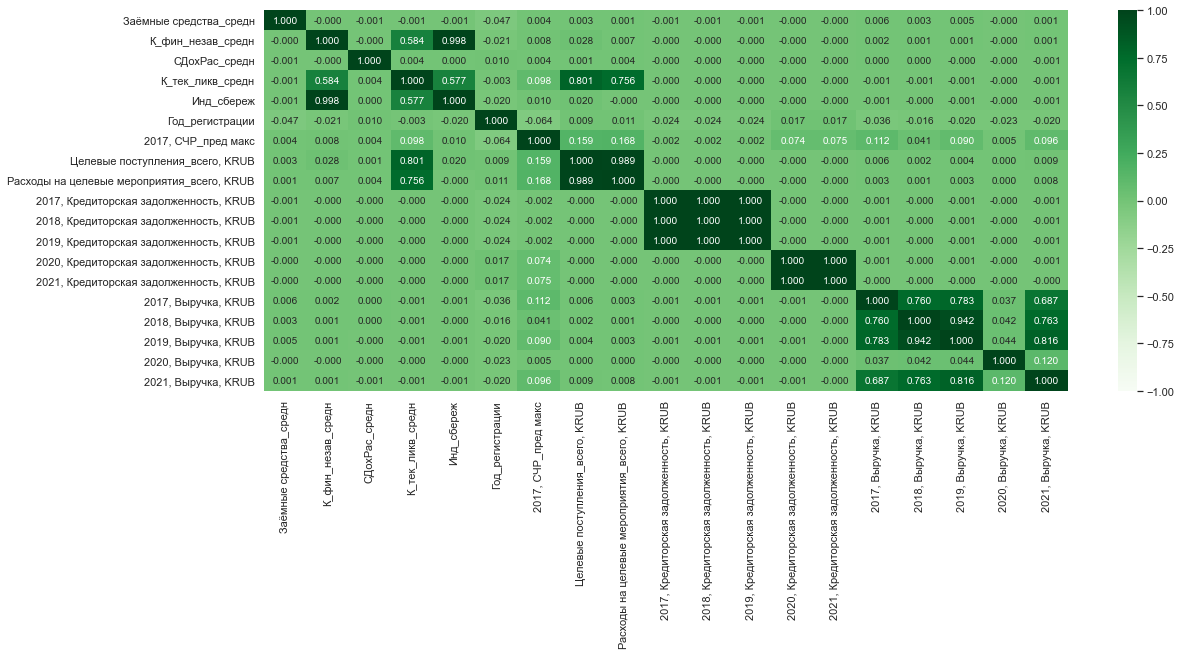

In [ ]:
fig, ax = plt.subplots(figsize=(18, 7))
sns.heatmap(data[column+col_КЗ+col_В].corr(), vmin=-1, vmax=1, annot=True, fmt='.3f', cmap='Greens');

Видно, что наличие заемных средств компаний имеет отрицательную связь с годом регистрации компании

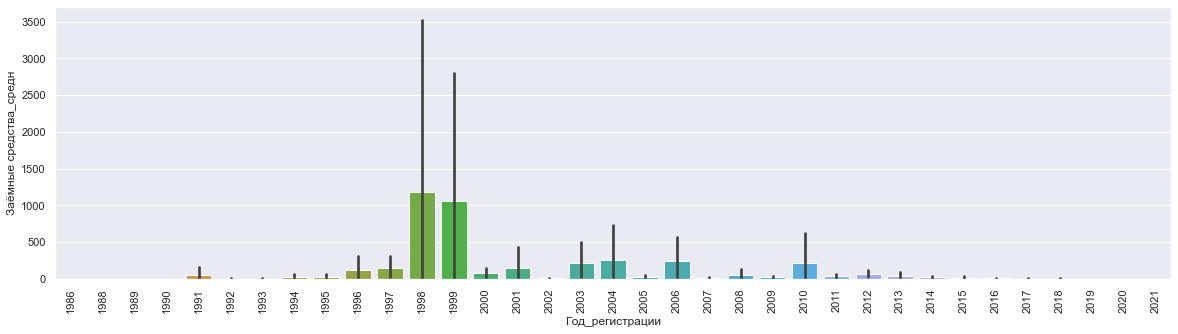

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x="Год_регистрации", y="Заёмные средства_средн", data=data)
plt.xticks(rotation=90)
plt.show();

Ааа, НКО, зарегистрированные в 1998 и 1999 имеют наибольшую закредитованность, после 2010 года объем заемных средств стремиться к нулю

***Вывод:*** Определить факторы, влияющие на закредитованность, финансовое благополучие организации. Пока был определен один фактор, повлиявший на закредитованность - это год регистрации, но он с закредитованность на данный момент имеет отрицательную взаимосвязь и наибольший объем заемный средств приходится на компании, зарегистрированные в 1998 и 1999 г.г., наверное это не просто так? А до этих дат и после объем заимствований НКО невелик. Можно было бы еще посмотреть на взаимосвязь заемных средств с организационно-правовой формой компании и регионом ее регистрации.